In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable



Read the file

In [51]:
# Read the Excel file
file_path = os.path.join('data', 'Booking_Data.xlsx')
df = pd.read_excel(file_path)

# Display the dataframe
print(df)


        Booking ID   Hotel Booking Date Arrival Date  Lead Time  Nights  \
0                1  Resort   2014-07-24   2015-07-01        342       0   
1                2  Resort   2013-06-24   2015-07-01        737       0   
2                3  Resort   2015-06-24   2015-07-01          7       1   
3                4  Resort   2015-06-18   2015-07-01         13       1   
4                5  Resort   2015-06-17   2015-07-01         14       2   
...            ...     ...          ...          ...        ...     ...   
119385      119386    City   2017-08-07   2017-08-30         23       7   
119386      119387    City   2017-05-21   2017-08-31        102       7   
119387      119388    City   2017-07-28   2017-08-31         34       7   
119388      119389    City   2017-05-14   2017-08-31        109       7   
119389      119390    City   2017-02-05   2017-08-29        205       9   

        Guests  Distribution Channel Customer Type         Country  \
0            2               

**Data Exploration and Preprocessing**

Data Inspection

In [52]:
#check the shape of dataset
df.shape

(119390, 17)

In [53]:
df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

Handling Missing and Duplicate values

In [55]:
#checking for duplicate values
print(df.duplicated().sum())
# Check for missing/null values in Dataset
print(df.isnull().sum())
# check for NaN values
print(df.isna().sum())

0
Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64
Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64


There are no duplicate values but there are 488 Null or Missing values of Country Col in Dataset

In [56]:
#checking category of features whoes having null values
print(df.Country.value_counts())

Country
Portugal          48590
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
                  ...  
Djibouti              1
Botswana              1
Honduras              1
Virgin Islands        1
Sierra Leone          1
Name: count, Length: 174, dtype: int64


We can see Portugal is most frequent country, so replacing null values with the most frequent Country.


In [57]:
# Replacing null values with the most frequent value in a variable
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])


In [58]:
#check the null values now after replacing
print(df.isnull().sum())

Booking ID              0
Hotel                   0
Booking Date            0
Arrival Date            0
Lead Time               0
Nights                  0
Guests                  0
Distribution Channel    0
Customer Type           0
Country                 0
Deposit Type            0
Avg Daily Rate          0
Status                  0
Status Update           0
Cancelled (0/1)         0
Revenue                 0
Revenue Loss            0
dtype: int64


Null Values have been replaced

Now lets look in to basic statistical details of data

In [59]:
#basic statistics of dataset
df.describe()


,Booking ID,Booking Date,Arrival Date,Lead Time,Nights,Guests,Avg Daily Rate,Status Update,Cancelled (0/1),Revenue,Revenue Loss
count,119390.000000,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000
mean,59695.500000,2016-05-16 16:23:19.353379840,2016-08-28 16:39:45.727447808,104.011416,3.427900,1.968239,101.831122,2016-07-30 00:24:47.883407104,0.370416,247.931966,-109.916242
min,1.000000,2013-06-24 00:00:00,2015-07-01 00:00:00,0.000000,0.000000,0.000000,-6.380000,2014-10-17 00:00:00,0.000000,-63.800000,-6300.000000
25%,29848.250000,2015-11-28 00:00:00,2016-03-13 00:00:00,18.000000,2.000000,2.000000,69.290000,2016-02-01 00:00:00,0.000000,0.000000,0.000000
50%,59695.500000,2016-05-04 00:00:00,2016-09-06 00:00:00,69.000000,3.000000,2.000000,94.575000,2016-08-07 00:00:00,0.000000,176.000000,0.000000
75%,89542.750000,2016-12-09 00:00:00,2017-03-18 00:00:00,160.000000,4.000000,2.000000,126.000000,2017-02-08 00:00:00,1.000000,342.977500,0.000000
max,119390.000000,2017-08-31 00:00:00,2017-08-31 00:00:00,737.000000,69.000000,55.000000,5400.000000,2017-09-14 00:00:00,1.000000,7590.000000,0.000000
std,34465.068657,NaN,NaN,106.863097,2.557439,0.722394,50.535790,NaN,0.482918,300.921393,277.102641


In [60]:
#drop booking_id column
df = df.drop('Booking ID', axis=1)


In [61]:
print(df.head())

    Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0  Resort   2014-07-24   2015-07-01        342       0       2   
1  Resort   2013-06-24   2015-07-01        737       0       2   
2  Resort   2015-06-24   2015-07-01          7       1       1   
3  Resort   2015-06-18   2015-07-01         13       1       1   
4  Resort   2015-06-17   2015-07-01         14       2       2   

  Distribution Channel Customer Type         Country Deposit Type  \
0               Direct     Transient        Portugal   No Deposit   
1               Direct     Transient        Portugal   No Deposit   
2               Direct     Transient  United Kingdom   No Deposit   
3            Corporate     Transient  United Kingdom   No Deposit   
4  Online Travel Agent     Transient  United Kingdom   No Deposit   

   Avg Daily Rate     Status Status Update  Cancelled (0/1)  Revenue  \
0             0.0  Check-Out    2015-07-01                0      0.0   
1             0.0  Check-Out    2015-07-01  

Handling Outliers for Numerical Variables

In [62]:
numerical_variables = df.select_dtypes(include='number').columns.tolist()
print(numerical_variables)



['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate', 'Cancelled (0/1)', 'Revenue', 'Revenue Loss']


Even though Cancelled, Number of guests are numerical but doesn't belong to continuos numerical variable where we can find outliers. 
So, find continous numerical variables and handle the outliers of it


In [63]:
discrete_variables = [var for var in numerical_variables if df[var].nunique() < 150]
continuous_variables = [var for var in numerical_variables if var not in discrete_variables]

print("Discrete Variables:")
print(discrete_variables)

print("Continuous Variables:")
print(continuous_variables)


Discrete Variables:
['Nights', 'Guests', 'Cancelled (0/1)']
Continuous Variables:
['Lead Time', 'Avg Daily Rate', 'Revenue', 'Revenue Loss']


Therefore, Lead Time, Avg Daily Rate, Revenue and Revenue Loss are our actual numerical variables


Checking for Outliers


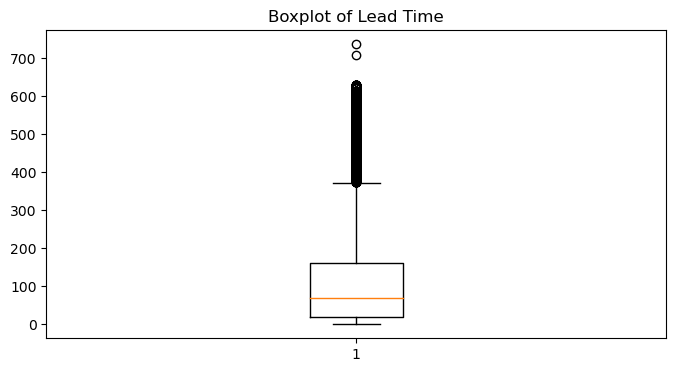

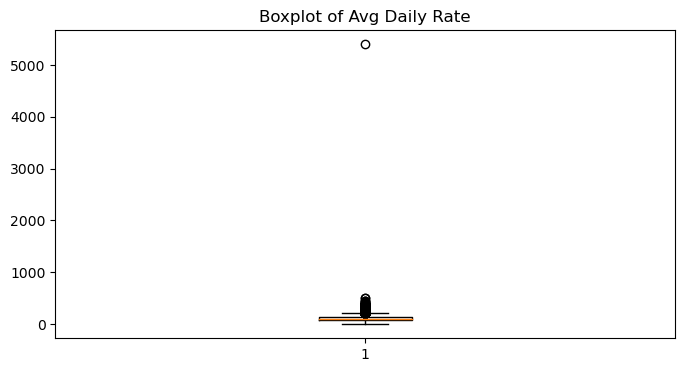

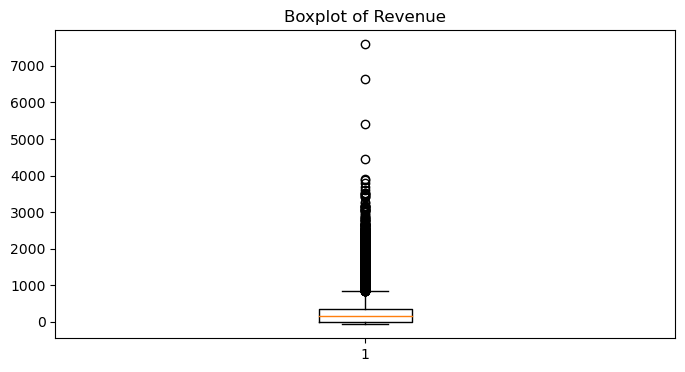

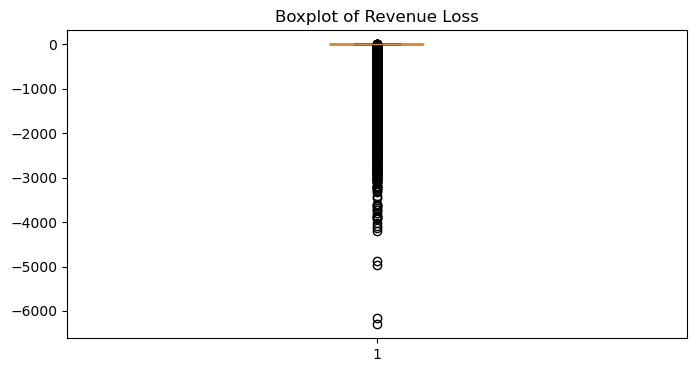

In [64]:
# Create box plots for continuous variables
for var in continuous_variables:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()


We can see there are outliers in all the numerical variables

In [65]:
# Calculate z-scores for the numerical variables
z_scores = stats.zscore(df[continuous_variables])

# Create a DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=continuous_variables)

# Remove rows with z-scores greater than the threshold
df_no_outliers = df[(z_scores_df.abs() < threshold).all(axis=1)]

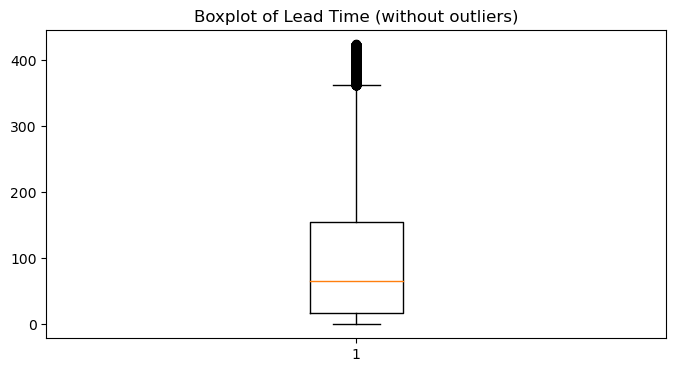

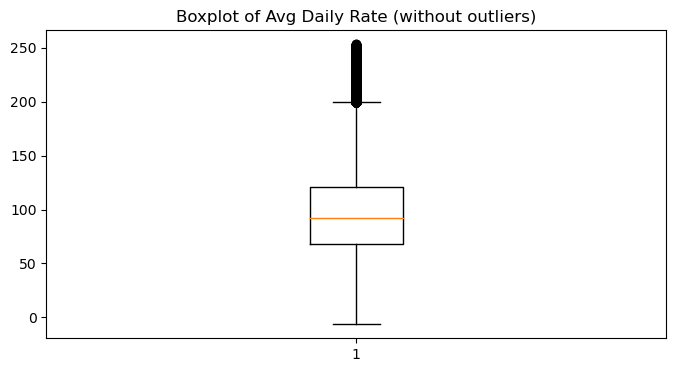

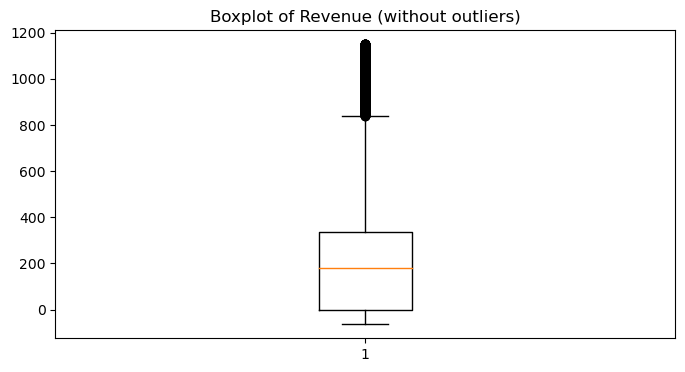

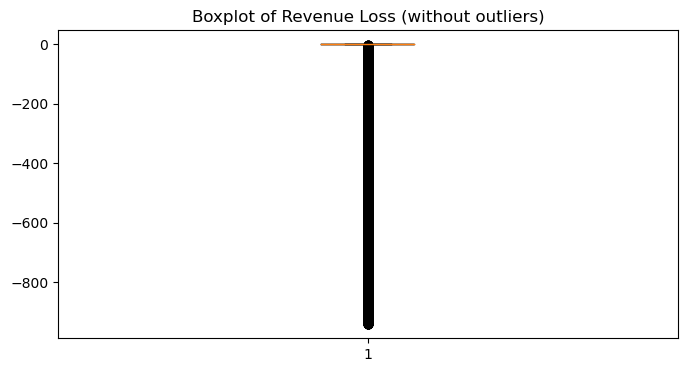

In [66]:
# Create box plots for continuous variables in df_no_outliers
for var in continuous_variables:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_no_outliers[var])
    plt.title(f'Boxplot of {var} (without outliers)')
    plt.show()


In [67]:
#describe data without outliers
df_no_outliers.describe()


,Booking Date,Arrival Date,Lead Time,Nights,Guests,Avg Daily Rate,Status Update,Cancelled (0/1),Revenue,Revenue Loss
count,112123,112123,112123.000000,112123.000000,112123.000000,112123.000000,112123,112123.000000,112123.000000,112123.000000
mean,2016-05-15 07:11:26.171436544,2016-08-21 13:38:46.163231744,98.268981,3.180846,1.936249,97.482680,2016-07-25 19:08:57.834342656,0.357902,225.610616,-80.744680
min,2014-06-09 00:00:00,2015-07-01 00:00:00,0.000000,0.000000,0.000000,-6.380000,2014-10-17 00:00:00,0.000000,-63.800000,-941.000000
25%,2015-11-28 00:00:00,2016-03-05 00:00:00,17.000000,2.000000,2.000000,68.000000,2016-02-01 00:00:00,0.000000,0.000000,0.000000
50%,2016-05-02 00:00:00,2016-08-30 00:00:00,66.000000,3.000000,2.000000,92.000000,2016-08-01 00:00:00,0.000000,178.200000,0.000000
75%,2016-12-07 00:00:00,2017-03-09 00:00:00,155.000000,4.000000,2.000000,120.600000,2017-02-02 00:00:00,1.000000,336.000000,0.000000
max,2017-08-31 00:00:00,2017-08-31 00:00:00,424.000000,57.000000,55.000000,253.330000,2017-09-10 00:00:00,1.000000,1150.050000,0.000000
std,NaN,NaN,98.677515,2.076325,0.700093,42.372173,NaN,0.479385,228.377381,176.720129


**Feature Engineering**

In [68]:
df_no_outliers.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0
5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [69]:
# Checking info of newly formed dataset after removed outliers
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112123 entries, 0 to 119388
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Hotel                 112123 non-null  object        
 1   Booking Date          112123 non-null  datetime64[ns]
 2   Arrival Date          112123 non-null  datetime64[ns]
 3   Lead Time             112123 non-null  int64         
 4   Nights                112123 non-null  int64         
 5   Guests                112123 non-null  int64         
 6   Distribution Channel  112123 non-null  object        
 7   Customer Type         112123 non-null  object        
 8   Country               112123 non-null  object        
 9   Deposit Type          112123 non-null  object        
 10  Avg Daily Rate        112123 non-null  float64       
 11  Status                112123 non-null  object        
 12  Status Update         112123 non-null  datetime64[ns]
 13  Canc

In [70]:
# Change datatype of variables Avg Daily Rate, Revenue and Revenue Loss to correct format from float64 to int64
df_no_outliers['Avg Daily Rate'] = df_no_outliers['Avg Daily Rate'].astype(int)
df_no_outliers['Revenue'] = df_no_outliers['Revenue'].astype(int)
df_no_outliers['Revenue Loss'] = df_no_outliers['Revenue Loss'].astype(int)

C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1075346829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Avg Daily Rate'] = df_no_outliers['Avg Daily Rate'].astype(int)
C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1075346829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Revenue'] = df_no_outliers['Revenue'].astype(int)
C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1075346829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [71]:
#checking unique values in each variable
for var in df_no_outliers.columns:
    print(var, df_no_outliers[var].unique())

Hotel ['Resort' 'City']
Booking Date <DatetimeArray>
['2014-07-24 00:00:00', '2015-06-24 00:00:00', '2015-06-18 00:00:00',
 '2015-06-17 00:00:00', '2015-07-01 00:00:00', '2015-06-22 00:00:00',
 '2015-04-07 00:00:00', '2015-04-17 00:00:00', '2015-06-08 00:00:00',
 '2015-05-27 00:00:00',
 ...
 '2015-04-28 00:00:00', '2015-07-26 00:00:00', '2015-05-17 00:00:00',
 '2015-09-20 00:00:00', '2014-10-17 00:00:00', '2015-09-27 00:00:00',
 '2015-01-20 00:00:00', '2015-02-01 00:00:00', '2015-02-17 00:00:00',
 '2015-11-22 00:00:00']
Length: 970, dtype: datetime64[ns]
Arrival Date <DatetimeArray>
['2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-03 00:00:00',
 '2015-07-04 00:00:00', '2015-07-05 00:00:00', '2015-07-06 00:00:00',
 '2015-07-07 00:00:00', '2015-07-08 00:00:00', '2015-07-09 00:00:00',
 '2015-07-10 00:00:00',
 ...
 '2016-01-20 00:00:00', '2015-12-09 00:00:00', '2017-03-21 00:00:00',
 '2016-01-11 00:00:00', '2015-12-16 00:00:00', '2015-11-22 00:00:00',
 '2015-12-08 00:00:00', '2016-0

In [76]:
#convert negative values of revenue loss in to positive
df_no_outliers['Revenue Loss'] = df_no_outliers['Revenue Loss'].abs()

#checking the dataset after converting negative values of revenue loss in to positive
print(df_no_outliers.head())
#checking unique values in each variable
for var in df_no_outliers.columns:
    print(var, df_no_outliers[var].unique())

    Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0  Resort   2014-07-24   2015-07-01        342       0       2   
2  Resort   2015-06-24   2015-07-01          7       1       1   
3  Resort   2015-06-18   2015-07-01         13       1       1   
4  Resort   2015-06-17   2015-07-01         14       2       2   
5  Resort   2015-06-17   2015-07-01         14       2       2   

  Distribution Channel Customer Type         Country Deposit Type  \
0               Direct     Transient        Portugal   No Deposit   
2               Direct     Transient  United Kingdom   No Deposit   
3            Corporate     Transient  United Kingdom   No Deposit   
4  Online Travel Agent     Transient  United Kingdom   No Deposit   
5  Online Travel Agent     Transient  United Kingdom   No Deposit   

   Avg Daily Rate     Status Status Update  Cancelled (0/1)  Revenue  \
0               0  Check-Out    2015-07-01                0        0   
2              75  Check-Out    2015-07-02  

C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1525832969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Revenue Loss'] = df_no_outliers['Revenue Loss'].abs()


In [83]:
# Creating 'guest_category' from variable 'Guests' where 1: single, 2 : couple or more :family
df_no_outliers['Guest Category'] = df_no_outliers['Guests'].apply(lambda x: 'single' if x == 1 else ('couple' if x == 2 else 'family'))

# Creating 'lead_time_category' from 'Lead Time' variale to display category
df_no_outliers['Lead Time Category'] = df_no_outliers['Lead Time'].apply(lambda x: 'short' if x <= 30 else ('medium' if x <= 60 else 'long'))

# Creating 'stay_duration_category' from 'Nights' variable to display category
df_no_outliers['Stay Duration Category'] = df_no_outliers['Nights'].apply(lambda x: 'short' if x <= 3 else ('medium' if x <= 7 else 'long'))

# Creating 'revenue_category' from 'Revenue' variable to display category
df_no_outliers['Revenue Category'] = df_no_outliers['Revenue'].apply(lambda x: 'low' if x <= 100 else ('medium' if x <= 200 else 'high'))

# Creating 'revenue_loss_category' from 'Revenue Loss' variable to display category
df_no_outliers['Revenue Loss Category'] = df_no_outliers['Revenue Loss'].apply(lambda x: 'low' if x <= 100 else ('medium' if x <= 200 else 'high'))

# Creating 'adr_category' from 'Avg Daily Rate' variable to display category
df_no_outliers['ADR Category'] = df_no_outliers['Avg Daily Rate'].apply(lambda x: 'low' if x <= 100 else ('medium' if x <= 200 else 'high'))

# Creating 'booking_year' from 'Booking Date' variable to display month
df_no_outliers['Booking Year'] = df_no_outliers['Booking Date'].dt.year
# Creating 'booking_month' from 'Booking Date' variable to display month
df_no_outliers['Booking Month'] = df_no_outliers['Booking Date'].dt.month_name()
# Creating 'booking_day' from 'Booking Date' variable to display day
df_no_outliers['Booking Day'] = df_no_outliers['Booking Date'].dt.day_name()

# Creating 'Arrival Year' from 'Arrival Date' variable to display month
df_no_outliers['Arrival Year'] = df_no_outliers['Arrival Date'].dt.year
# Creating 'Arrival Month' from 'Arrival Date' variable to display month
df_no_outliers['Arrival Month'] = df_no_outliers['Arrival Date'].dt.month_name()
# Creating 'Arrival Day' from 'Arrival Date' variable to display day
df_no_outliers['Arrival Day'] = df_no_outliers['Arrival Date'].dt.day_name()

#check dataset after creating new variables
df_no_outliers.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,...,Stay Duration Category,Revenue Category,Revenue Loss Category,ADR Category,Booking Month,Booking Day,Arrival Month,Arrival Day,Booking Year,Arrival Year
0,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,...,short,low,low,low,July,Thursday,July,Wednesday,2014,2015
2,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,...,short,low,low,low,June,Wednesday,July,Wednesday,2015,2015
3,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,...,short,low,low,low,June,Thursday,July,Wednesday,2015,2015
4,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,...,short,medium,low,low,June,Wednesday,July,Wednesday,2015,2015
5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,...,short,medium,low,low,June,Wednesday,July,Wednesday,2015,2015


In [84]:
#shape of dataset after creating new variables
df_no_outliers.shape

(111944, 28)

Check for rows with 0 guests

In [85]:
# Remove rows having value 0 in Guests variable
df_no_outliers = df_no_outliers[df_no_outliers['Guests'] != 0]
df_no_outliers.shape

(111944, 28)

As there cannot be 0 guests, rows with 0 guests are removed

In [86]:
# Checking info of new dataset
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111944 entries, 0 to 119388
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Hotel                   111944 non-null  object        
 1   Booking Date            111944 non-null  datetime64[ns]
 2   Arrival Date            111944 non-null  datetime64[ns]
 3   Lead Time               111944 non-null  int64         
 4   Nights                  111944 non-null  int64         
 5   Guests                  111944 non-null  int64         
 6   Distribution Channel    111944 non-null  object        
 7   Customer Type           111944 non-null  object        
 8   Country                 111944 non-null  object        
 9   Deposit Type            111944 non-null  object        
 10  Avg Daily Rate          111944 non-null  int32         
 11  Status                  111944 non-null  object        
 12  Status Update           111944 non-

Exporting dataset for further visualization in Tableau

In [87]:
#export the dataset to new csv file
df_no_outliers.to_csv('data/Booking_Data_Cleaned.csv', index=False)

**Exploratory Data Analysis**

**Univariate Analysis**

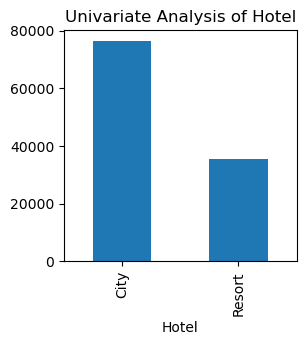

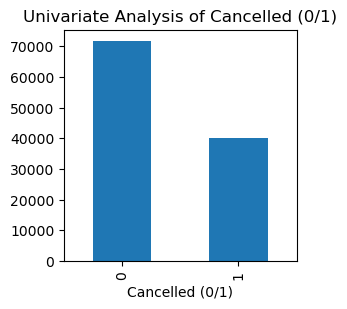

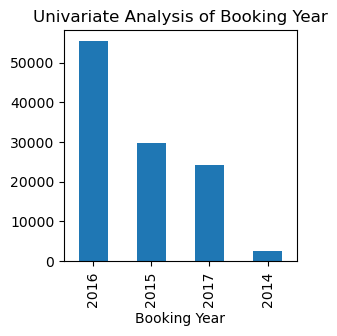

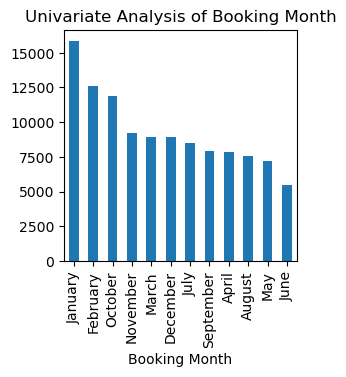

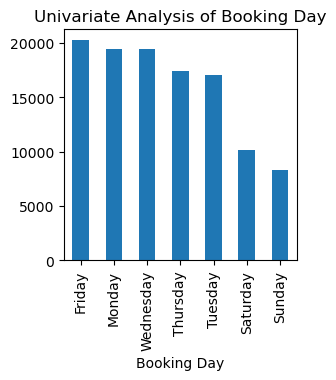

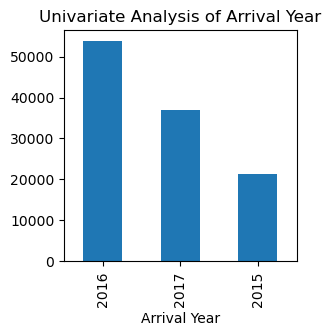

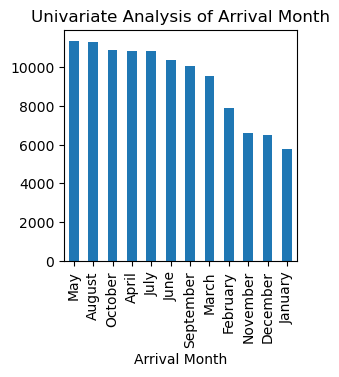

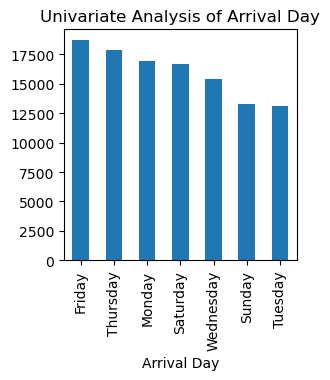

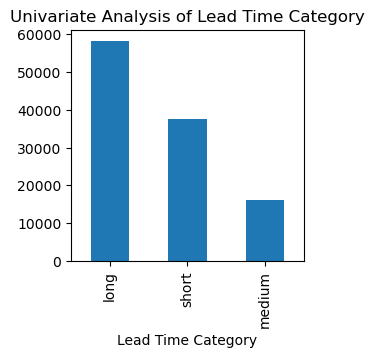

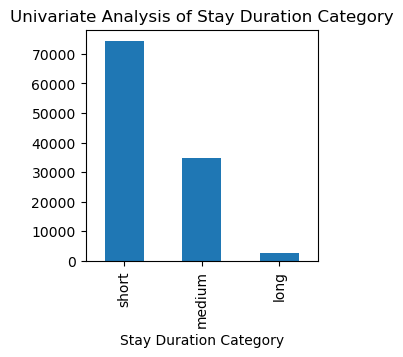

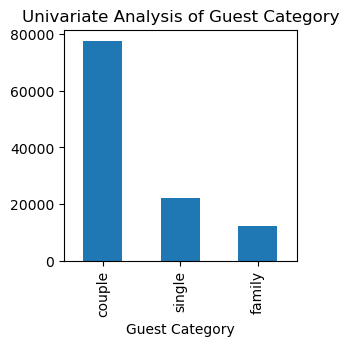

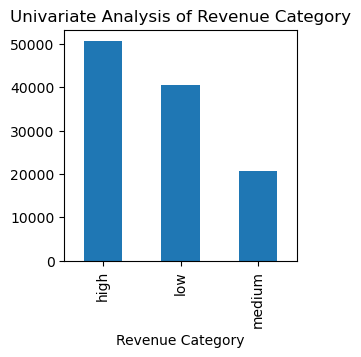

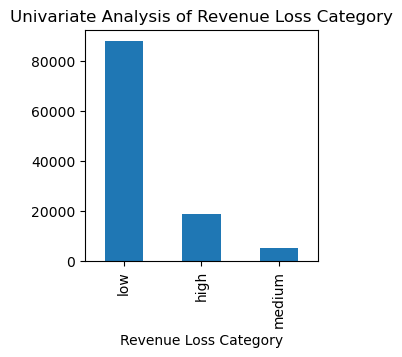

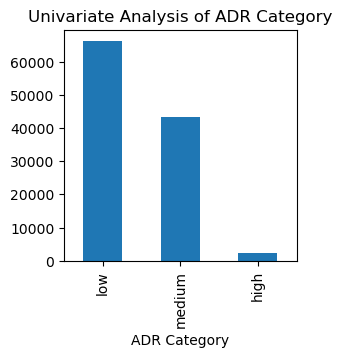

In [96]:
#performing univariate analysis
# performing univariate analysis on "Hotel", "Cancelled", "Booking year", "Booking month", "Booking day", "Arrival year", "Arrival month", "Arrival day", "Lead Time Category", "Stay Duration Category", "Guest Category", "Revenue Category", "Revenue Loss Category", "ADR Category"
def univariate_analysis(var):
    for i in var:
        plt.figure(figsize=(3,3))
        
        df_no_outliers[i].value_counts().plot(kind='bar')
        plt.title(f'Univariate Analysis of {i}')
        plt.show()
columns = ["Hotel", "Cancelled (0/1)", "Booking Year", "Booking Month", "Booking Day", "Arrival Year", "Arrival Month", "Arrival Day", "Lead Time Category", "Stay Duration Category", "Guest Category", "Revenue Category", "Revenue Loss Category", "ADR Category"]
univariate_analysis(columns)

According to the graphs,
* Non-cancelled bookings significantly outnumber cancelled ones in this univariate analysis.
* 2016 as the year with the highest booking count, followed by a decline in subsequent years.
* Bookings are most frequent in January, decreasing through to June.
* Booking days peak on Friday and sharply decrease by Sunday.
* Arrivals are highest in 2016, with a decrease in 2017 and the least in 2015.
* May sees the highest arrival month, tapering off towards January.
* Arrivals are most frequent on Friday, with the least on Tuesday.
* Long lead times dominate over medium and short.
* Short stay durations far outweigh medium and long stays.
* Couples constitute the majority of the guest category, with singles and families being less.
* The high revenue category outnumbers medium and low.
* Low revenue losses occur most frequently, with fewer medium and high instances.
* Most bookings fall into the low Average Daily Rate (ADR) category, with fewer in the medium and high categories.

**Bivariate Analysis**

**Booking Patterns**

1. What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

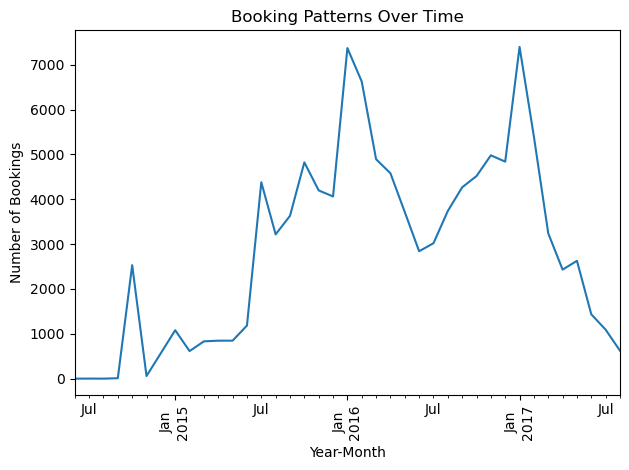

In [100]:
# Create a new column 'YearMonth' for aggregation
df_no_outliers['YearMonth'] = df_no_outliers['Booking Date'].dt.to_period('M')

# Aggregate bookings by 'YearMonth'
booking_trends = df_no_outliers.groupby('YearMonth').size()

# Plotting the booking trends
booking_trends.plot(title='Booking Patterns Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

The booking patterns over time show fluctuations with peaks and troughs, indicating seasonality and potential specific months with increased booking activity.

2. How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

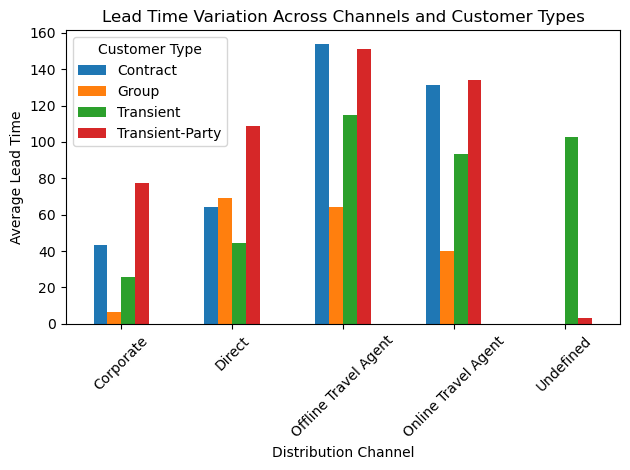

0.08100923417303951

In [106]:
# Now, let's analyze lead time variation across different booking channels and its correlation with customer type.

# Grouping by 'Distribution Channel' and 'Customer Type', then computing the mean 'Lead Time'
lead_time_variation = df_no_outliers.groupby(['Distribution Channel', 'Customer Type'])['Lead Time'].mean().unstack()

# Plotting the lead time variation
lead_time_variation.plot(kind='bar', title='Lead Time Variation Across Channels and Customer Types')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

# For correlation, we can calculate the Pearson correlation coefficient
# First, we need to convert 'Customer Type' to a numerical format
df_no_outliers['Customer Type Num'] = df_no_outliers['Customer Type'].astype('category').cat.codes
correlation = df_no_outliers[['Lead Time', 'Customer Type Num']].corr(method='pearson')
correlation_lead_customer = correlation.iloc[0, 1]
correlation_lead_customer


The bar chart shows the variation of average lead time across different distribution channels for each customer type, with some visible differences between channels and types. The Pearson correlation coefficient between lead time and customer type is approximately 0.081, indicating a very weak positive correlation.

**Customer Behavior Analysis**

3. Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?

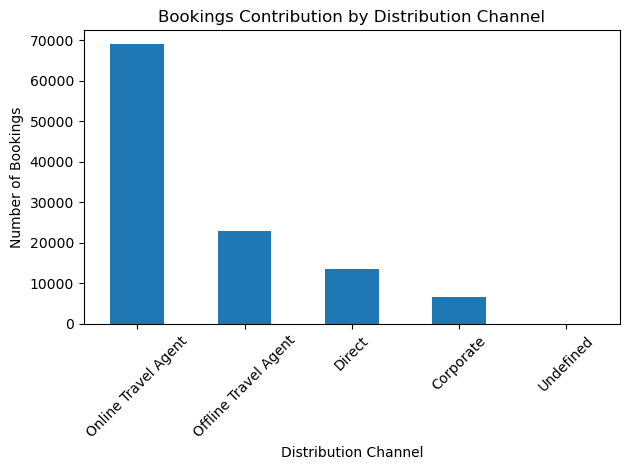

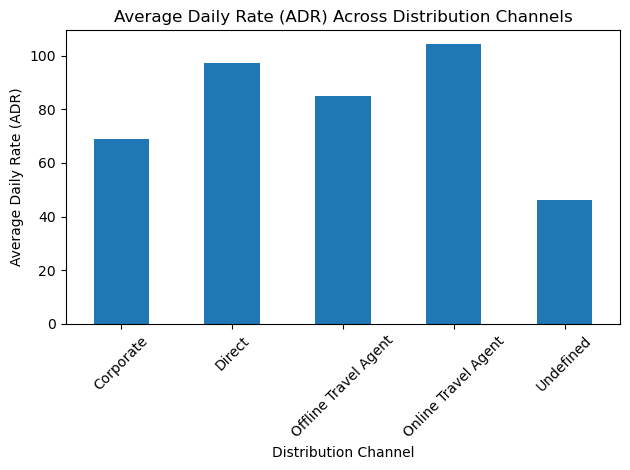

In [107]:
# Contribution to bookings
channel_bookings = df_no_outliers['Distribution Channel'].value_counts()

# ADR difference across channels
channel_adr = df_no_outliers.groupby('Distribution Channel')['Avg Daily Rate'].mean()

# Plotting the contribution to bookings
channel_bookings.plot(kind='bar', title='Bookings Contribution by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

# Plotting the ADR difference
channel_adr.plot(kind='bar', title='Average Daily Rate (ADR) Across Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()


The bar charts display the bookings' contribution by distribution channel and the average daily rate (ADR) across distribution channels. We can observe which channels are most popular for bookings and compare the ADR provided by each channel.

4. Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

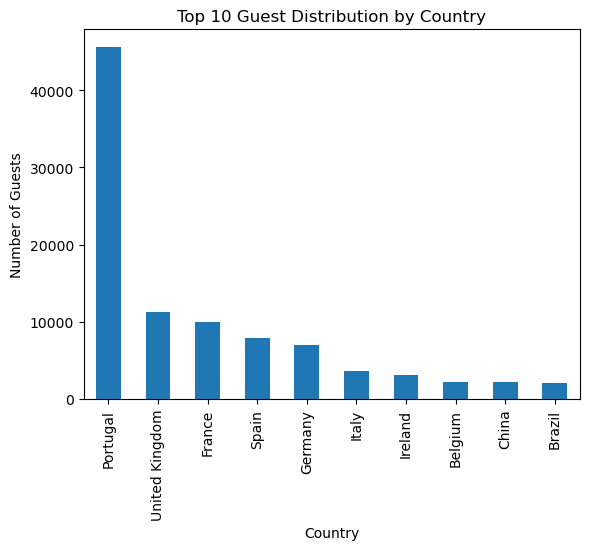

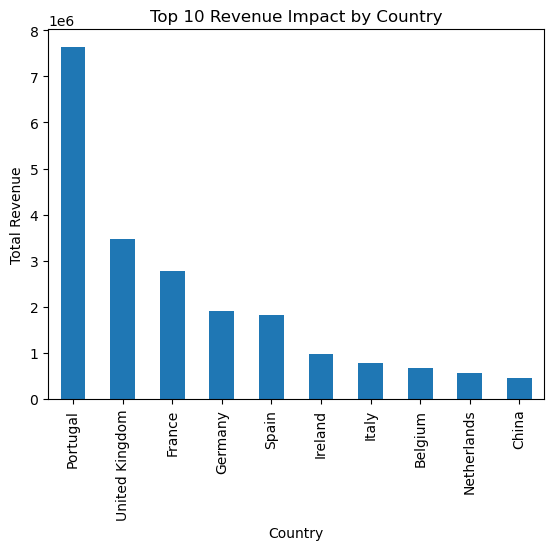

In [108]:
# First, let's examine the guest distribution based on country of origin.
country_guest_distribution = df_no_outliers['Country'].value_counts().head(10)  # Limit to top 10 countries for readability

# Now, let's look at the impact on revenue by country.
country_revenue_impact = df_no_outliers.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plotting the guest distribution
country_guest_distribution.plot(kind='bar', title='Top 10 Guest Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.show()

# Plotting the revenue impact
country_revenue_impact.plot(kind='bar', title='Top 10 Revenue Impact by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.show()


The guest distribution by country graph shows the top 10 countries where most guests originate, while the revenue impact graph highlights the top 10 countries contributing to the total revenue. These insights can help target marketing efforts and understand the market better.

**Cancellation Analysis**

5. What factors are most strongly correlated with cancellations, and can we predict potential cancellations based on certain variables?

In [115]:
# We'll use the entire dataframe to find correlations with 'Cancelled'
# Dropping non-numeric columns for correlation computation
numeric_df = df_no_outliers.select_dtypes(include=['number', 'bool'])
correlations_with_cancellation = numeric_df.corr()['Cancelled (0/1)'].sort_values()

# Predicting cancellations could involve building a predictive model, which is outside the scope of a simple analysis.
# However, we can check which variables are most strongly correlated with cancellations.
correlations_with_cancellation

Revenue             -0.459284
Booking Year        -0.118813
Customer Type Num   -0.066541
Nights              -0.009022
Arrival Year         0.005447
Guests               0.035438
Avg Daily Rate       0.044020
Lead Time            0.287692
Revenue Loss         0.612022
Cancelled (0/1)      1.000000
Name: Cancelled (0/1), dtype: float64

The correlation analysis reveals that 'Revenue Loss' has a strong positive correlation with cancellations (approximately 0.61), suggesting that as revenue loss increases, the likelihood of cancellations also increases. 'Lead Time' also shows a positive correlation with cancellations, indicating that longer lead times might be associated with a higher chance of cancellations

6. How does the revenue loss from cancellations compare across different customer segments and distribution channels?

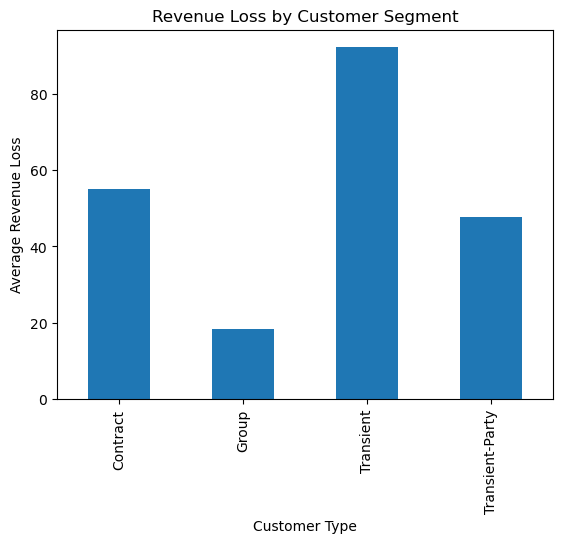

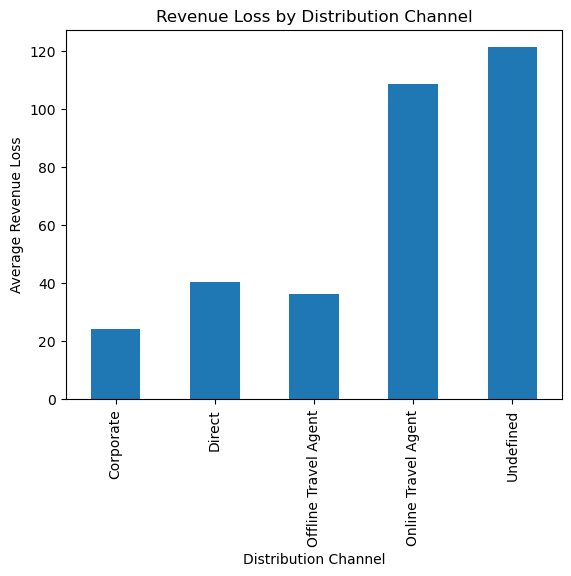

In [109]:
# For cancellation analysis, we'll first identify factors most strongly correlated with cancellations.

# binary 'Cancelled' column indicating whether a booking was cancelled (1) or not (0)
# We'll use the entire dataframe to find correlations with 'Cancelled'
# Dropping non-numeric columns for correlation computation
numeric_df = df_no_outliers.select_dtypes(include=['number', 'bool'])
correlations_with_cancellation = numeric_df.corr()['Cancelled (0/1)'].sort_values()

# check which variables are most strongly correlated with cancellations.
correlations_with_cancellation

# Next, let's analyze revenue loss from cancellations across different customer segments and distribution channels.
revenue_loss_by_segment = df_no_outliers.groupby('Customer Type')['Revenue Loss'].mean()
revenue_loss_by_channel = df_no_outliers.groupby('Distribution Channel')['Revenue Loss'].mean()

# Plotting revenue loss by customer segment
revenue_loss_by_segment.plot(kind='bar', title='Revenue Loss by Customer Segment')
plt.xlabel('Customer Type')
plt.ylabel('Average Revenue Loss')
plt.show()

# Plotting revenue loss by distribution channel
revenue_loss_by_channel.plot(kind='bar', title='Revenue Loss by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Revenue Loss')
plt.show()


* Customer segments show varying average revenue loss due to cancellations, with 'Transient' customers having the highest loss, followed by 'Contract', 'Transient-Party', and 'Group'.
* Distribution channels also show different average revenue loss, with 'Online Travel Agent' and 'Undefined' showing the highest losses, while 'Corporate' has the lowest.

**Revenue Optimization**

7. What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?

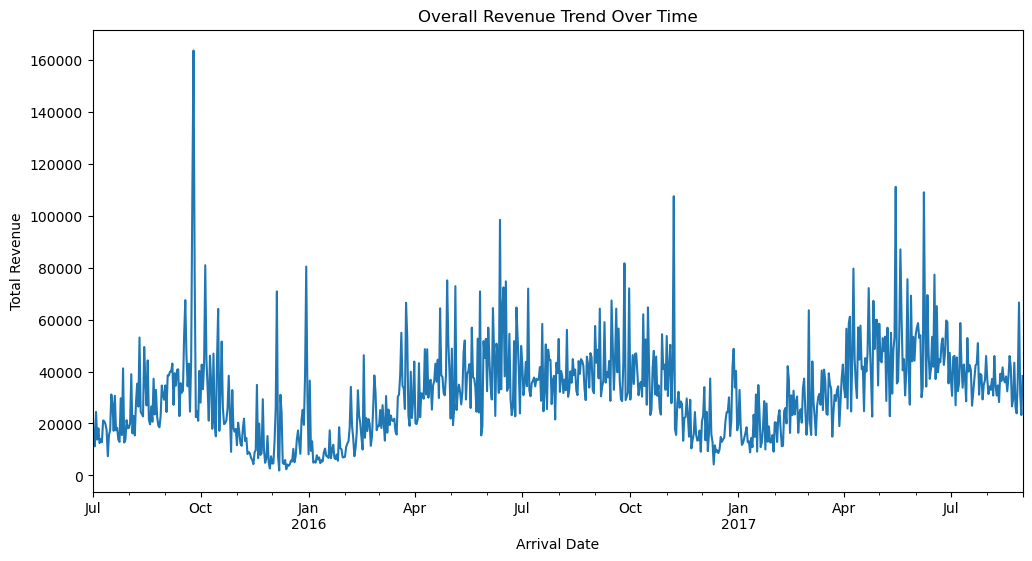

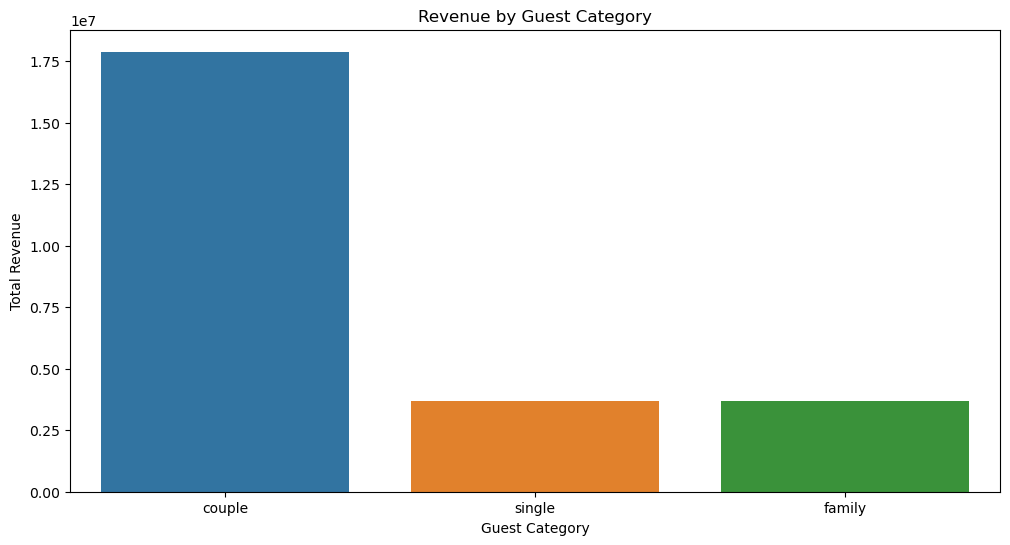

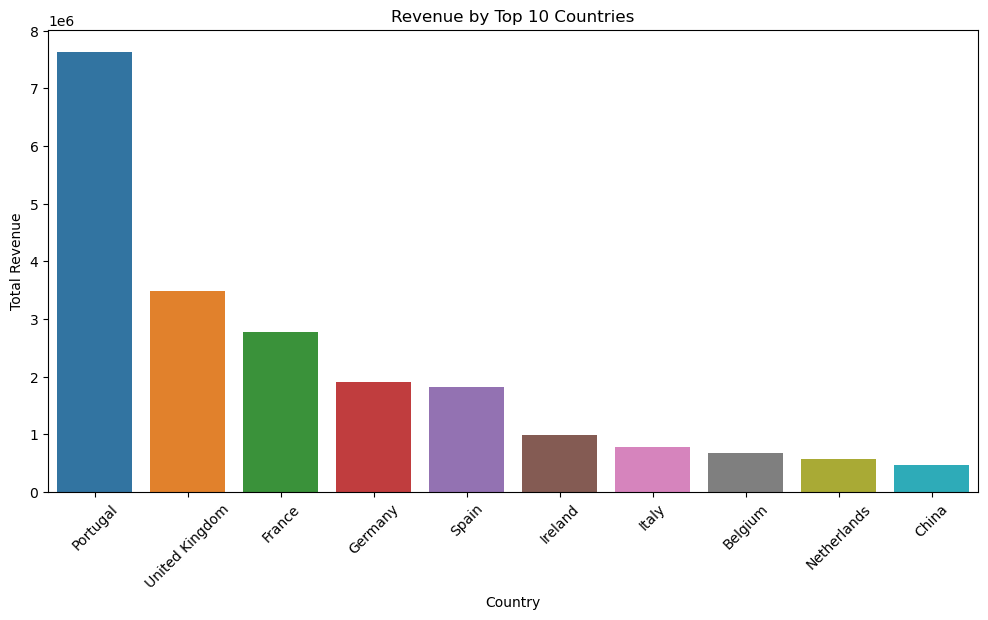

In [118]:
# Analyzing the overall revenue trend over time
# We need to make sure 'Arrival Date' is in datetime format and sort the dataframe by this date
df_no_outliers['Arrival Date'] = pd.to_datetime(df_no_outliers['Arrival Date'])
df_sorted_by_date = df_no_outliers.sort_values('Arrival Date')

# Grouping by Arrival Date to see the revenue trend
revenue_trend = df_sorted_by_date.groupby('Arrival Date')['Revenue'].sum()

# Plotting the overall revenue trend
plt.figure(figsize=(12,6))
revenue_trend.plot(title='Overall Revenue Trend Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Total Revenue')
plt.show()

# Analyzing the revenue contribution by customer segments
revenue_by_guest_category = df_no_outliers.groupby('Guest Category')['Revenue'].sum().sort_values(ascending=False)

# Plotting revenue contribution by guest category
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_guest_category.index, y=revenue_by_guest_category.values)
plt.title('Revenue by Guest Category')
plt.xlabel('Guest Category')
plt.ylabel('Total Revenue')
plt.show()

# Analyzing the revenue contribution by countries
# Selecting the top 10 countries contributing to revenue
top_countries = df_no_outliers.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plotting revenue contribution by top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Revenue by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


The plots visualize the overall revenue trends and contributions by customer segments and countries:

* Overall Revenue Trend Over Time: The line graph represents how the total revenue changes across the time frame of the dataset. The x-axis marks the arrival dates, and the y-axis represents the total revenue. A trend line can help identify any patterns, increases, or decreases over time.

* Revenue by Guest Category: The bar chart shows the total revenue generated by different guest categories. It helps identify which category (single, couple, family) contributes the most to the revenue.

* Revenue by Top 10 Countries: The bar chart displays the top 10 countries contributing to revenue. This indicates the revenue distribution geographically and helps identify the highest revenue-generating countries.

8. Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?

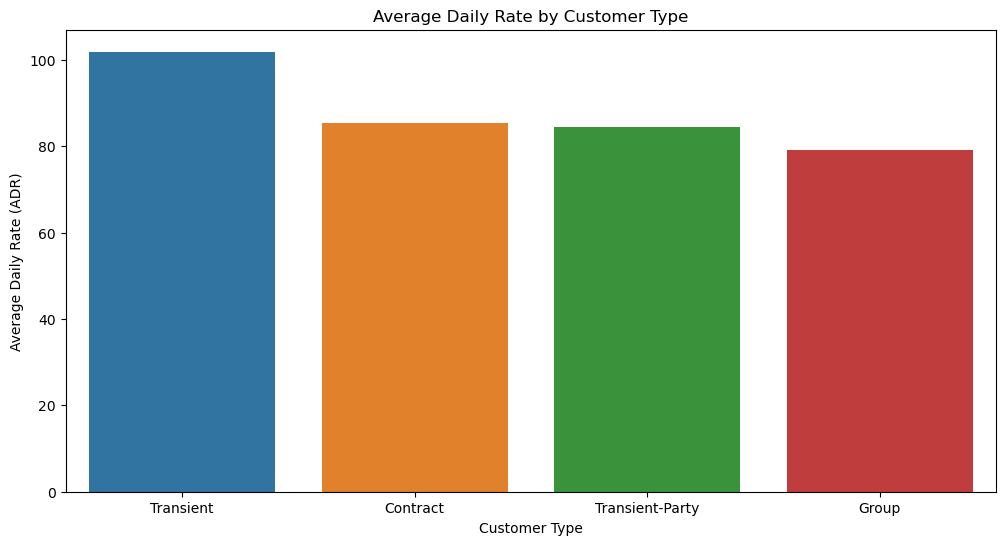

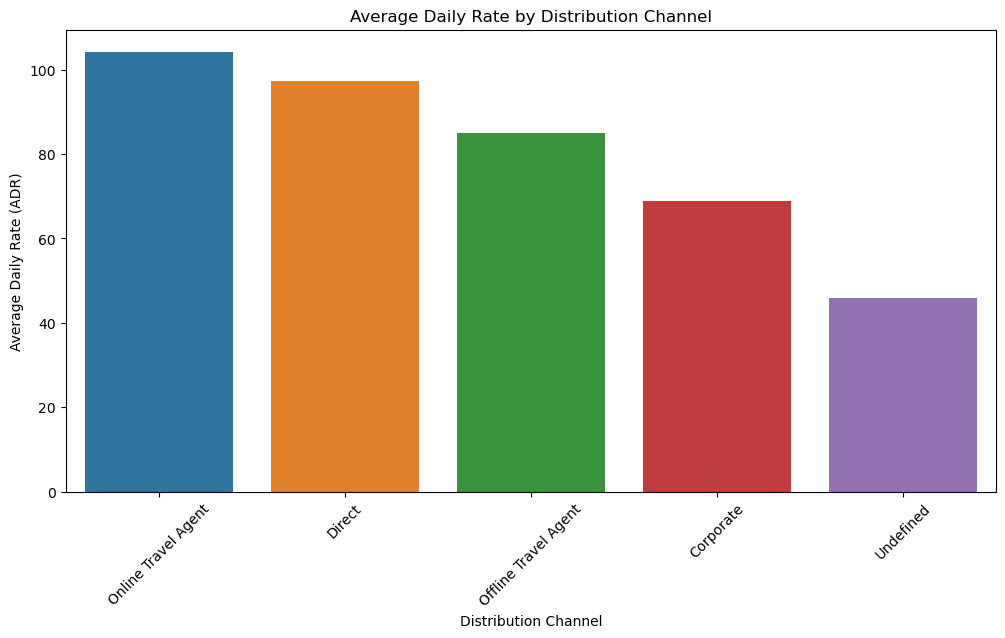

In [119]:
# Grouping the data by Customer Type and Distribution Channel to analyze the ADR
adr_by_customer_type = df_no_outliers.groupby('Customer Type')['Avg Daily Rate'].mean().sort_values(ascending=False)
adr_by_distribution_channel = df_no_outliers.groupby('Distribution Channel')['Avg Daily Rate'].mean().sort_values(ascending=False)

# Plotting ADR by Customer Type
plt.figure(figsize=(12,6))
sns.barplot(x=adr_by_customer_type.index, y=adr_by_customer_type.values)
plt.title('Average Daily Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

# Plotting ADR by Distribution Channel
plt.figure(figsize=(12,6))
sns.barplot(x=adr_by_distribution_channel.index, y=adr_by_distribution_channel.values)
plt.title('Average Daily Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()


The bar charts represent the average daily rate (ADR) for different customer types and distribution channels:

* ADR by Customer Type: The chart depicts the average price paid per day by each customer type. The customer types are listed on the x-axis, and the ADR is on the y-axis. A higher bar indicates a higher average rate paid by customers in that category.

* ADR by Distribution Channel: This chart shows the average price paid per day across different distribution channels through which bookings are made. The channels are on the x-axis and the ADR on the y-axis. This visualization can help in identifying which channels are associated with higher or lower pricing strategies.

**Geographical Analysis**

9. How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?

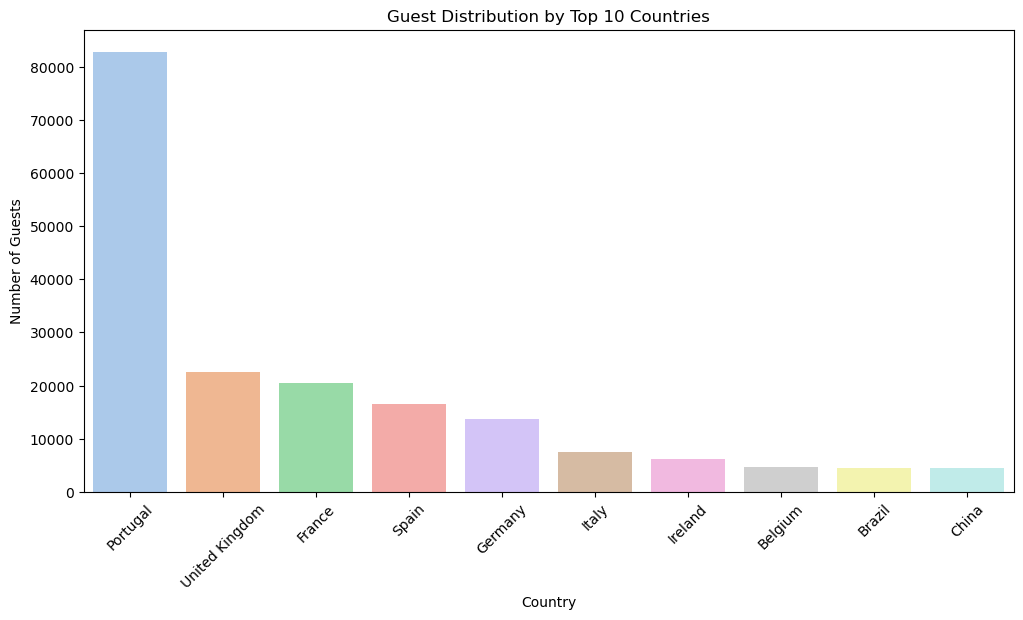

In [134]:
# Grouping the data by Country and summing up the number of guests to analyze the distribution
guest_distribution_by_country = df_no_outliers.groupby('Country')['Guests'].sum().sort_values(ascending=False)

# Since there could be a large number of countries, we will focus on the top 10 countries with the most guests
top_countries_by_guests = guest_distribution_by_country.head(10)

# Plotting the distribution of guests by top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries_by_guests.index, y=top_countries_by_guests.values, palette='pastel')
plt.title('Guest Distribution by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()


C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\349514948.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


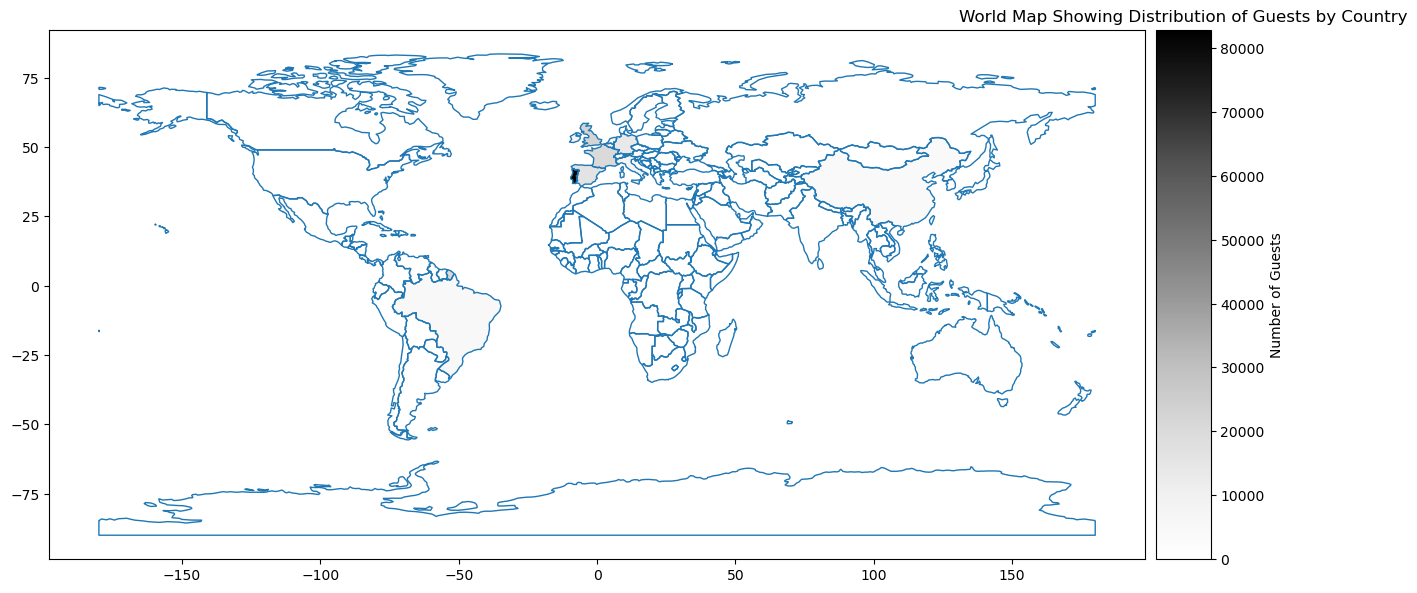

In [124]:


# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the guest distribution data
world = world.merge(guest_distribution_by_country, how="left", left_on="name", right_index=True)

# Replace NaN values with 0 for countries that do not have any guests in the dataset
world['Guests'] = world['Guests'].fillna(0)

# Plotting the map with the distribution of guests
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='Guests', ax=ax, legend=True, cax=cax, cmap='Greys', 
           legend_kwds={'label': "Number of Guests", 'orientation': "vertical"})

plt.title('World Map Showing Distribution of Guests by Country')
plt.show()


The bar chart illustrates the distribution of guests among the top 10 countries. It indicates that:

* Portugal leads by a significant margin, suggesting a high concentration of guests from this country.
* The United Kingdom, France, Spain, and Germany also contribute a substantial number of guests, making them important markets.
* Italy, Ireland, Belgium, Brazil, and China follow, with fewer guests compared to the leading countries but still notable numbers.

10. Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?

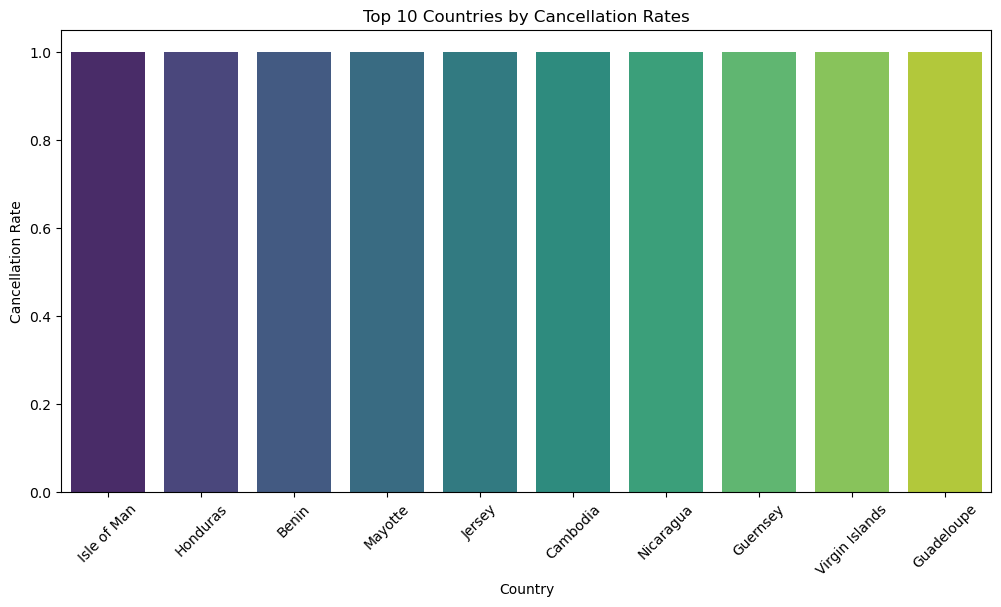

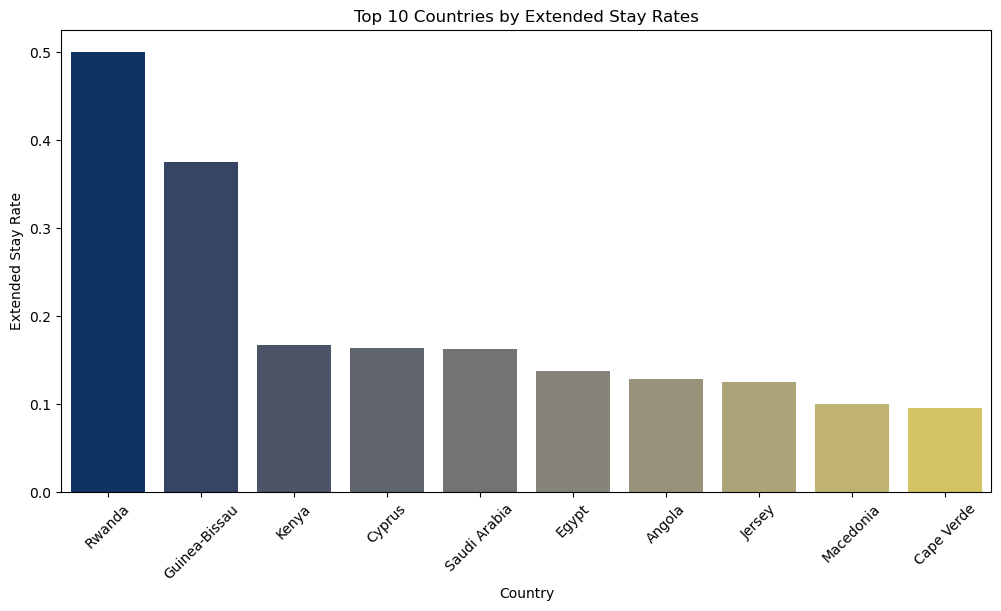

In [125]:
# For the correlation between country of origin and likelihood of cancellations
# We will calculate the cancellation rate per country
df_no_outliers['Cancellation'] = df_no_outliers['Cancelled (0/1)'].astype(int)
cancellation_rates = df_no_outliers.groupby('Country')['Cancellation'].mean().sort_values(ascending=False)

# For extended stays, we assume "long" stay duration category indicates an extended stay
# We will calculate the rate of extended stays per country
df_no_outliers['Extended Stay'] = (df_no_outliers['Stay Duration Category'] == 'long').astype(int)
extended_stay_rates = df_no_outliers.groupby('Country')['Extended Stay'].mean().sort_values(ascending=False)

# Plotting the top 10 countries with the highest cancellation rates
top_countries_cancellation = cancellation_rates.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries_cancellation.index, y=top_countries_cancellation.values, palette='viridis')
plt.title('Top 10 Countries by Cancellation Rates')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 10 countries with the highest extended stay rates
top_countries_extended_stay = extended_stay_rates.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries_extended_stay.index, y=top_countries_extended_stay.values, palette='cividis')
plt.title('Top 10 Countries by Extended Stay Rates')
plt.xlabel('Country')
plt.ylabel('Extended Stay Rate')
plt.xticks(rotation=45)
plt.show()


C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\208333590.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


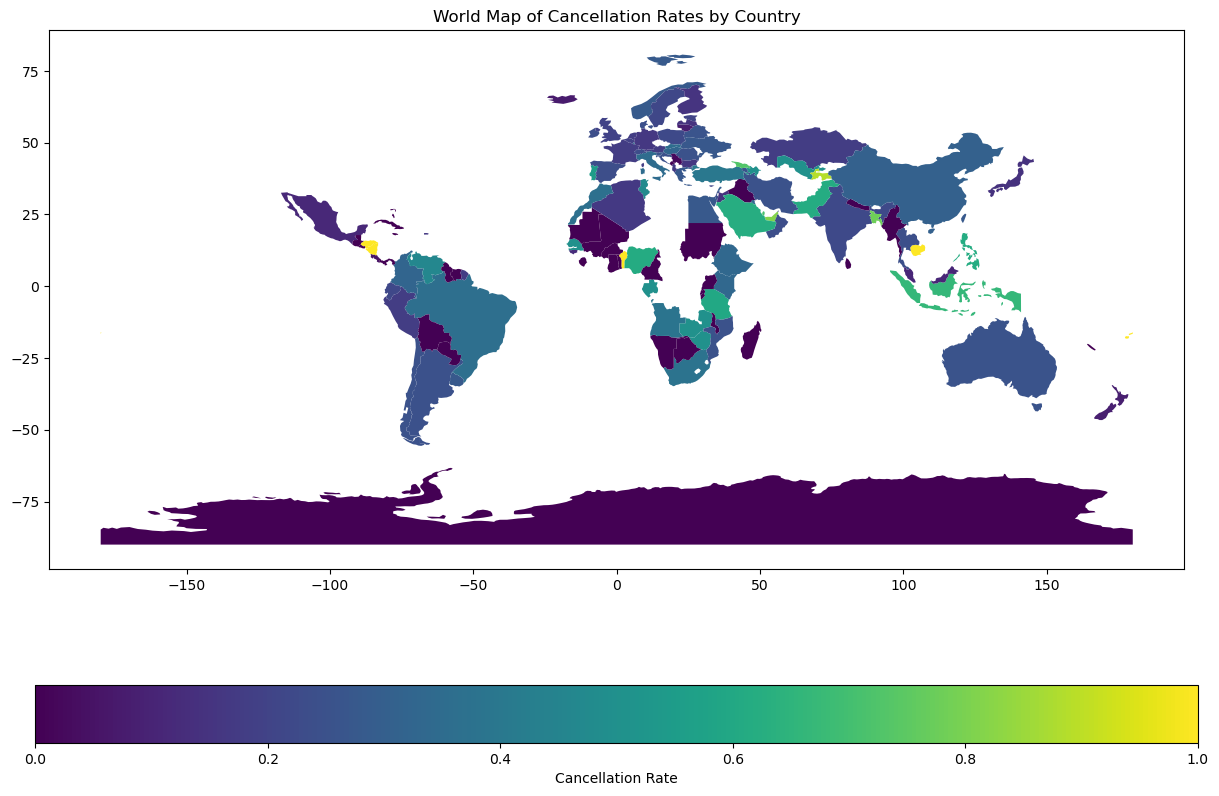

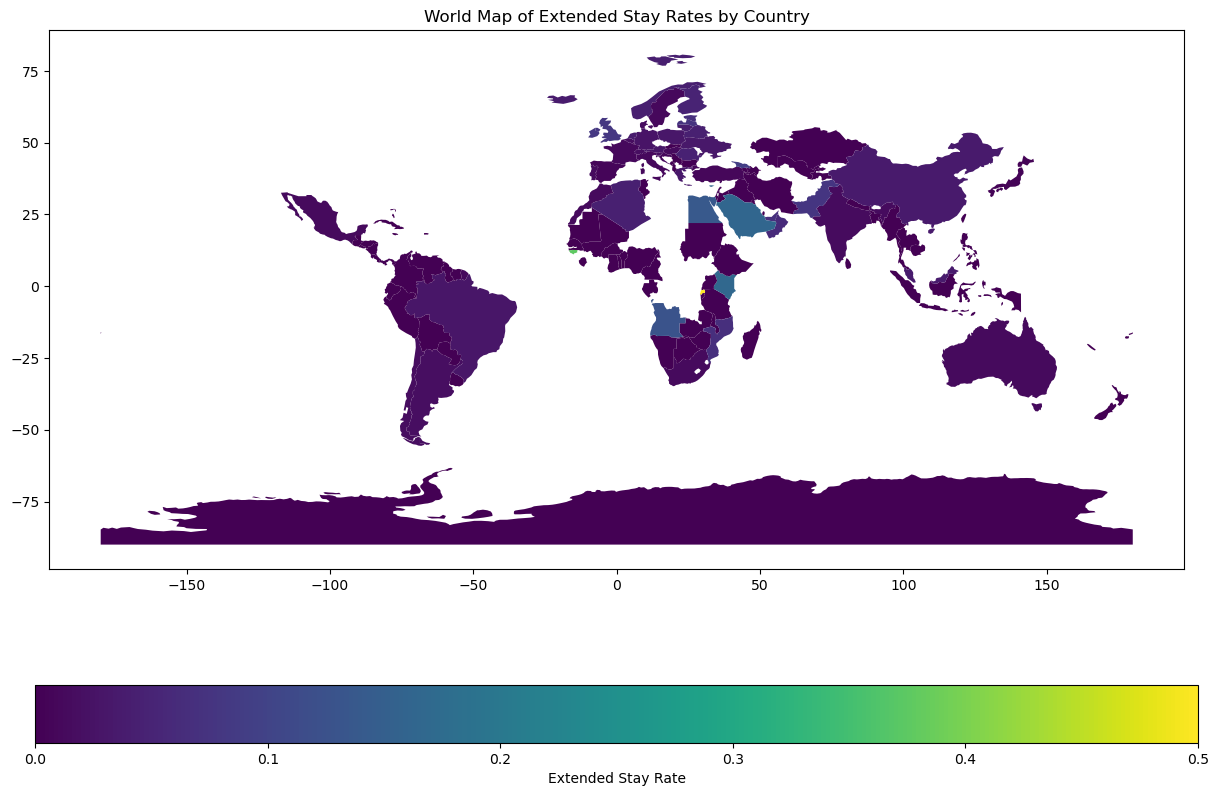

In [131]:
# Assuming 'world' is a GeoDataFrame containing the world's map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge cancellation and extended stay rates with the world map GeoDataFrame
world = world.merge(cancellation_rates, how='left', left_on='name', right_index=True)
world = world.merge(extended_stay_rates, how='left', left_on='name', right_index=True)

# Plot cancellation rates on the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cancellation', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Cancellation Rate", 'orientation': "horizontal"})
plt.title('World Map of Cancellation Rates by Country')
plt.show()

# Plot extended stay rates on the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Extended Stay', ax=ax, legend=True, cmap='viridis',
           legend_kwds={'label': "Extended Stay Rate", 'orientation': "horizontal"})
plt.title('World Map of Extended Stay Rates by Country')
plt.show()


* Top 10 Countries by Cancellation Rates: This shows the countries with the highest average cancellation rates. A higher cancellation rate may indicate issues such as unreliable bookings or potential areas for improving customer satisfaction.

* Top 10 Countries by Extended Stay Rates: This highlights the countries with the highest rates of extended stays. This could indicate that guests from these countries prefer longer vacations or business trips, which might be useful for targeting longer booking packages.

**Operational Efficiency**

11. What is the average length of stay for guests, and how does it differ based on booking channels or customer types?

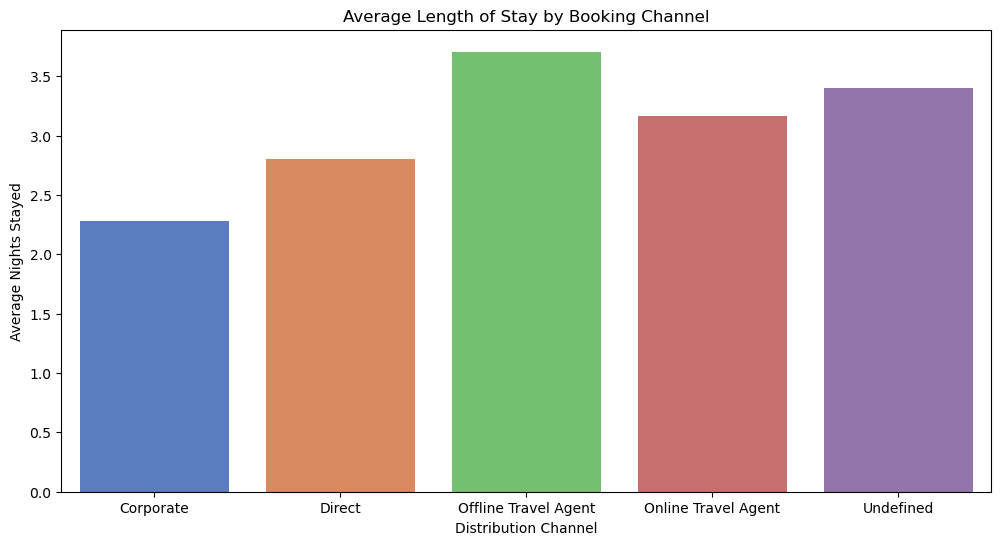

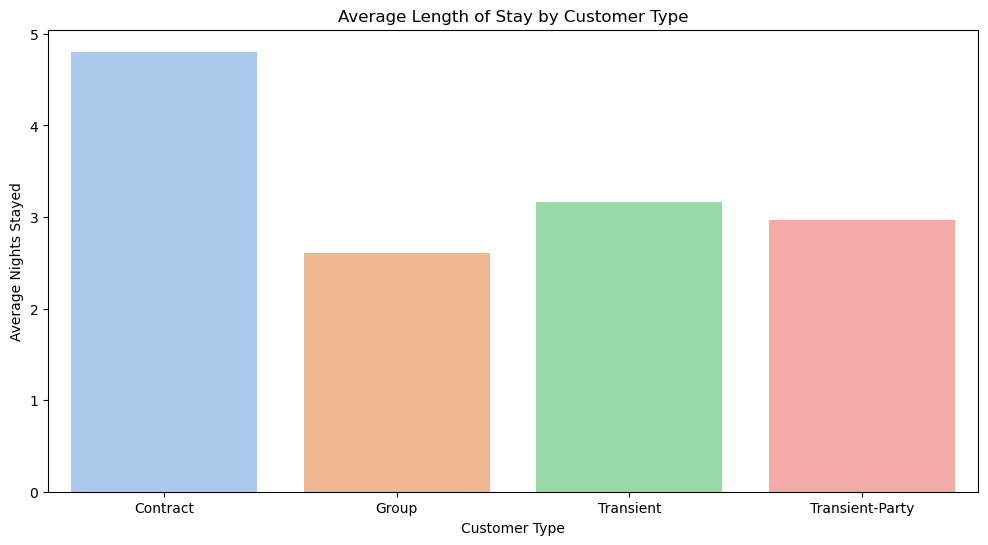

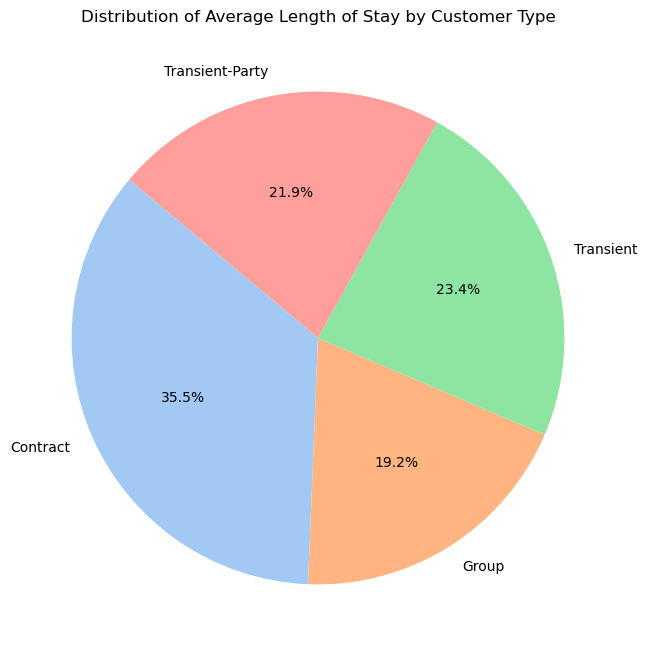

In [135]:
# Calculating the average length of stay for guests, grouped by Booking Channels and Customer Types
avg_length_of_stay_by_channel = df_no_outliers.groupby('Distribution Channel')['Nights'].mean()
avg_length_of_stay_by_customer_type = df_no_outliers.groupby('Customer Type')['Nights'].mean()

# Plotting the average length of stay by Booking Channel
plt.figure(figsize=(12,6))
sns.barplot(x=avg_length_of_stay_by_channel.index, y=avg_length_of_stay_by_channel.values, palette='muted')
plt.title('Average Length of Stay by Booking Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Nights Stayed')
plt.show()

# Plotting the average length of stay by Customer Type
plt.figure(figsize=(12,6))
sns.barplot(x=avg_length_of_stay_by_customer_type.index, y=avg_length_of_stay_by_customer_type.values, palette='pastel')
plt.title('Average Length of Stay by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Nights Stayed')
plt.show()

# To offer a different type of graph for each, we'll create a pie chart for one of them
# Let's use a pie chart for the distribution of nights by customer type
plt.figure(figsize=(8,8))
avg_length_of_stay_by_customer_type.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Average Length of Stay by Customer Type')
plt.ylabel('')  # Hide the 'Nights' label
plt.show()


* Average Length of Stay by Booking Channel: The first bar chart shows the average number of nights guests stay based on the booking channel they use. Each bar represents a different channel, allowing for a clear comparison of the average stay length across channels.

* Average Length of Stay by Customer Type: The second bar chart illustrates the average stay length broken down by customer type. This can provide insights into whether business travelers, families, or solo travelers tend to stay longer.

* Distribution of Average Length of Stay by Customer Type: The pie chart offers a proportional look at how different customer types contribute to the overall average stay length. Each slice of the pie represents the average contribution of each customer type to the total average length of stay, providing a visual distribution.

12. Are there patterns in check-out dates that can inform staffing and resource allocation strategies?

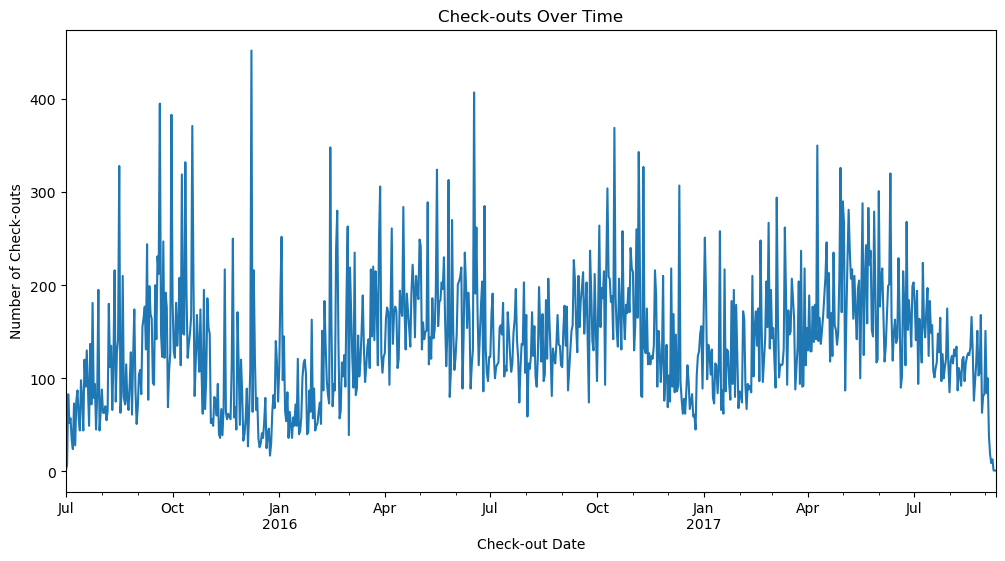

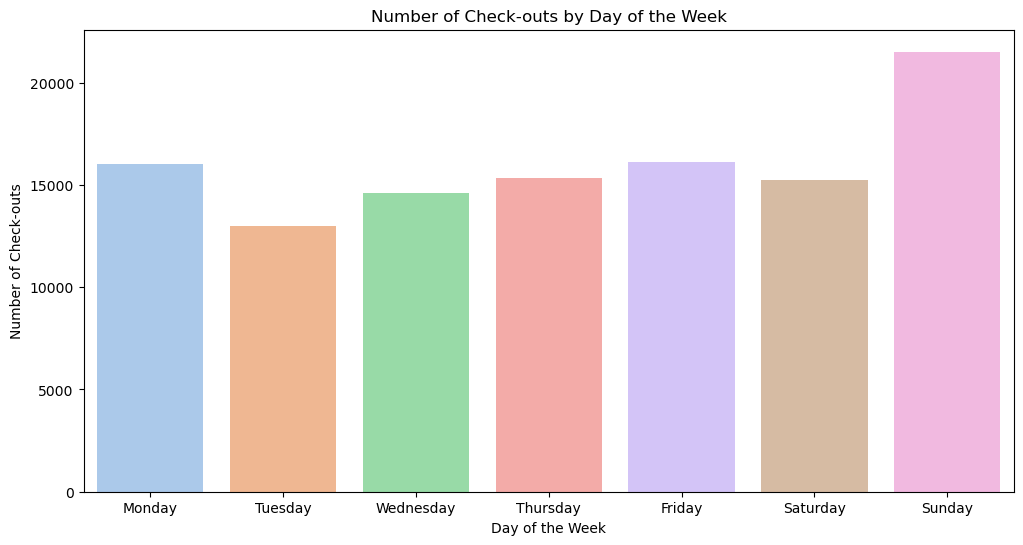

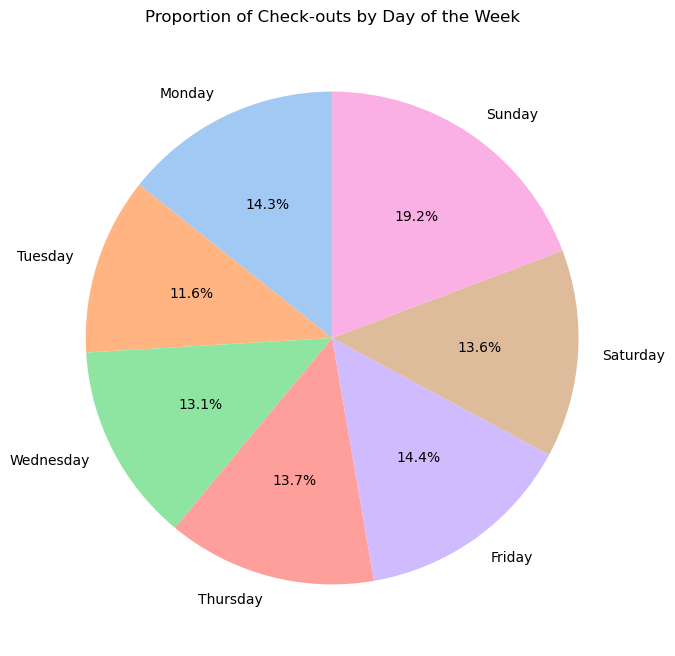

In [133]:
# Assuming 'Check-out Date' can be calculated by adding 'Nights' to 'Arrival Date'
# First, we'll create a 'Check-out Date' column
df_no_outliers['Check-out Date'] = df_no_outliers['Arrival Date'] + pd.to_timedelta(df_no_outliers['Nights'], unit='D')

# Grouping by Check-out Date to find patterns in the data
checkout_counts_by_date = df_no_outliers.groupby('Check-out Date').size()

# Plotting the number of checkouts over time
plt.figure(figsize=(12,6))
checkout_counts_by_date.plot(title='Check-outs Over Time')
plt.xlabel('Check-out Date')
plt.ylabel('Number of Check-outs')
plt.show()

# To find weekly patterns, let's aggregate data by day of the week
df_no_outliers['Check-out Day of Week'] = df_no_outliers['Check-out Date'].dt.day_name()
checkout_counts_by_day = df_no_outliers.groupby('Check-out Day of Week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting the number of checkouts by day of the week
plt.figure(figsize=(12,6))
sns.barplot(x=checkout_counts_by_day.index, y=checkout_counts_by_day.values, palette='pastel')
plt.title('Number of Check-outs by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Check-outs')
plt.show()

# For a different type of graph, let's use a pie chart to show the proportion of checkouts by day of the week
plt.figure(figsize=(8,8))
checkout_counts_by_day.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Check-outs by Day of the Week')
plt.ylabel('')  # Hide the 'Number of Check-outs' label
plt.show()


* Check-outs Over Time: The line graph illustrates the number of check-outs on each date over the period covered by the dataset. This can reveal overall trends and fluctuations in check-out volume.
* Number of Check-outs by Day of the Week: The bar chart breaks down the check-outs by each day of the week, which can help identify the busiest days and potential staffing needs.
* Proportion of Check-outs by Day of the Week: The pie chart shows the proportion of total check-outs that occur on each day of the week, offering a clear visual of how check-out volume is distributed throughout the week.

**Impact of Deposit Types**

13. How does the presence or absence of a deposit impact the likelihood of cancellations and revenue generation?

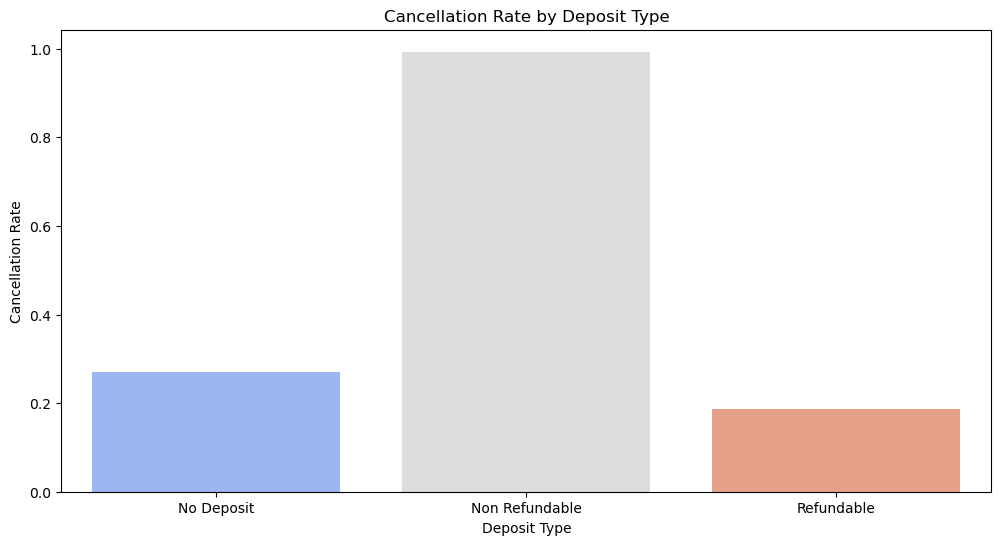

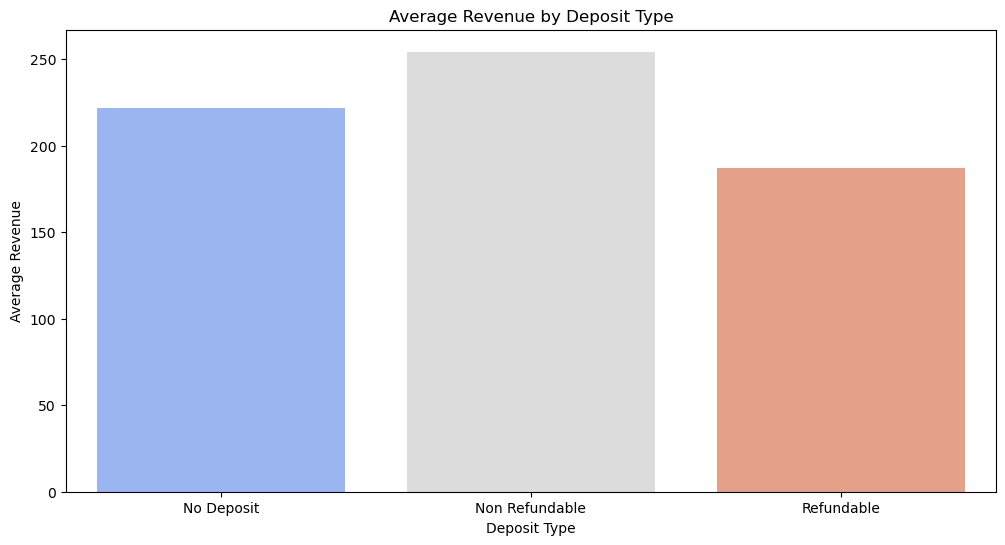

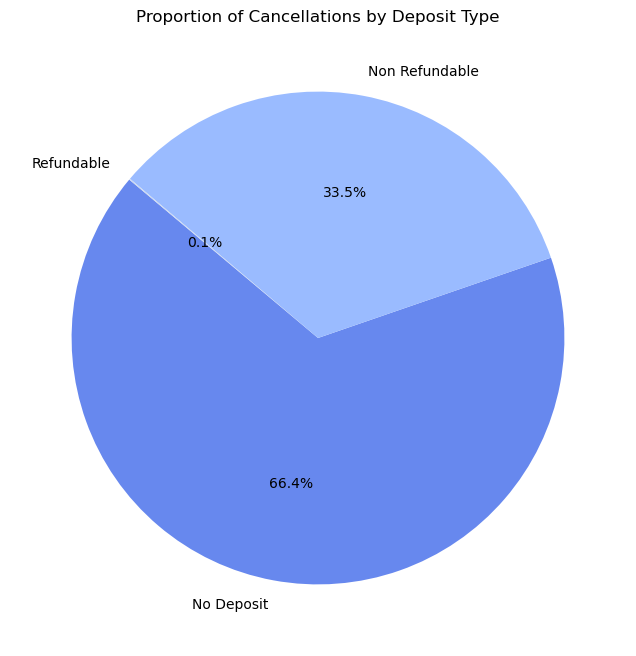

In [137]:
# Grouping the data by Deposit Type to analyze its impact on cancellations and revenue
cancellation_rate_by_deposit = df_no_outliers.groupby('Deposit Type')['Cancellation'].mean()
average_revenue_by_deposit = df_no_outliers.groupby('Deposit Type')['Revenue'].mean()

# Plotting cancellation rate by Deposit Type
plt.figure(figsize=(12,6))
sns.barplot(x=cancellation_rate_by_deposit.index, y=cancellation_rate_by_deposit.values, palette='coolwarm')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Plotting average revenue by Deposit Type
plt.figure(figsize=(12,6))
sns.barplot(x=average_revenue_by_deposit.index, y=average_revenue_by_deposit.values, palette='coolwarm')
plt.title('Average Revenue by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Average Revenue')
plt.show()

# For a different perspective, let's use a pie chart to show the proportion of cancellations by Deposit Type
cancellations_by_deposit = df_no_outliers.groupby('Deposit Type')['Cancellation'].sum()

plt.figure(figsize=(8,8))
cancellations_by_deposit.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm'))
plt.title('Proportion of Cancellations by Deposit Type')
plt.ylabel('')  # Hide the 'Cancellation' label
plt.show()


* Cancellation Rate by Deposit Type: This bar chart illustrates how the cancellation rate varies with different deposit types. It provides insights into whether requiring a deposit influences guests' decision to cancel their booking.
* Average Revenue by Deposit Type: The second bar chart shows the average revenue generated from bookings with different deposit requirements. This can help understand the financial implications of deposit policies.
* Proportion of Cancellations by Deposit Type: The pie chart displays the proportion of total cancellations attributed to each deposit type, offering a visual representation of which deposit policies are associated with higher cancellation numbers.

14. Can we identify any patterns in the use of deposit types across different customer
segments?

<Figure size 1200x600 with 0 Axes>

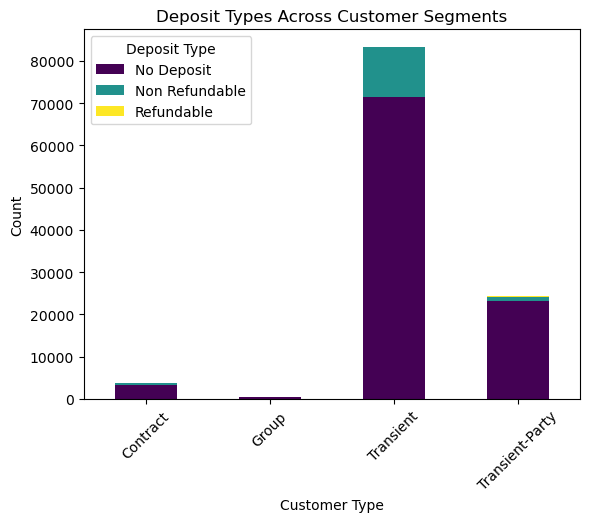

Deposit Type,No Deposit,Non Refundable,Refundable
Customer Type,,,
Contract,3255,544,1
Group,539,0,8
Transient,71386,11864,14
Transient-Party,23068,1133,132


In [141]:
# Analyzing the use of deposit types across different customer segments
deposit_type_by_customer_segment = df_no_outliers.groupby(['Customer Type', 'Deposit Type']).size().unstack(fill_value=0)

# Plotting the distribution of deposit types across customer segments
plt.figure(figsize=(12,6))
deposit_type_by_customer_segment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Deposit Types Across Customer Segments')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Deposit Type')
plt.xticks(rotation=45)
plt.show()

deposit_type_by_customer_segment


* Transient customers, likely representing individual travelers, predominantly do not use deposits, but when they do, they lean towards non-refundable options, possibly to secure better rates.
* Transient-Party and Contract customers show a preference for no deposits, but a small portion opts for refundable deposits, indicating a desire for flexibility.
* Group customers show minimal usage of deposits, with a slight inclination towards refundable deposits when used, which may reflect group booking policies or negotiations

**Analysis of Corporate Bookings**

15. What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?

Proportion of Corporate Bookings: 0.00%


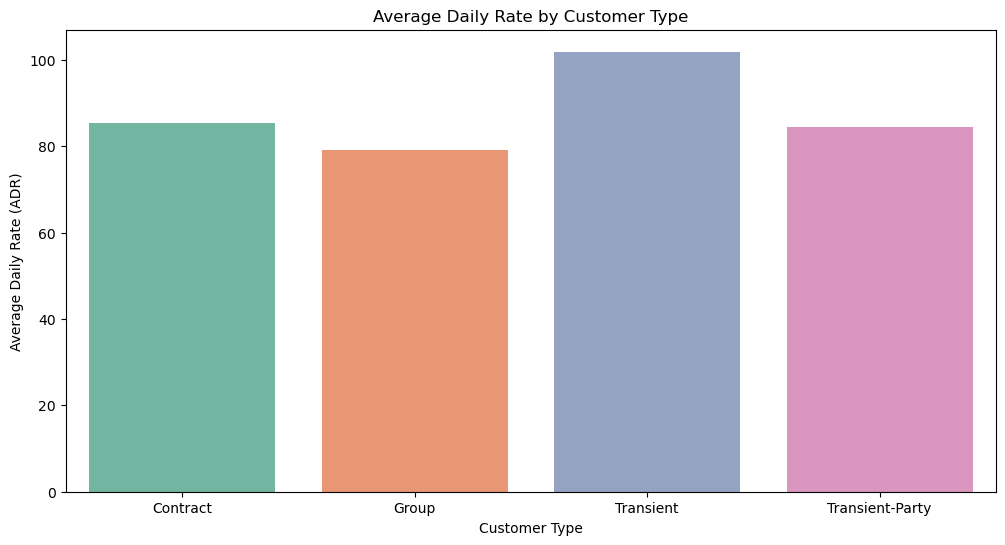

In [138]:
# Calculating the proportion of corporate bookings
total_bookings = df_no_outliers.shape[0]
corporate_bookings_count = df_no_outliers[df_no_outliers['Customer Type'] == 'Corporate'].shape[0]
corporate_bookings_proportion = corporate_bookings_count / total_bookings

# Comparing the ADR of Corporate bookings to other customer types
adr_by_customer_type = df_no_outliers.groupby('Customer Type')['Avg Daily Rate'].mean()

# Proportion of corporate bookings
print(f"Proportion of Corporate Bookings: {corporate_bookings_proportion*100:.2f}%")

# Plotting ADR by Customer Type for comparison
plt.figure(figsize=(12,6))
sns.barplot(x=adr_by_customer_type.index, y=adr_by_customer_type.values, palette='Set2')
plt.title('Average Daily Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


The proportion of Corporate Bookings in the dataset is 0.00%

**Time-to-Event Analysis**

16. How does the time between booking and arrival date (lead time) affect revenue and the
likelihood of cancellations?

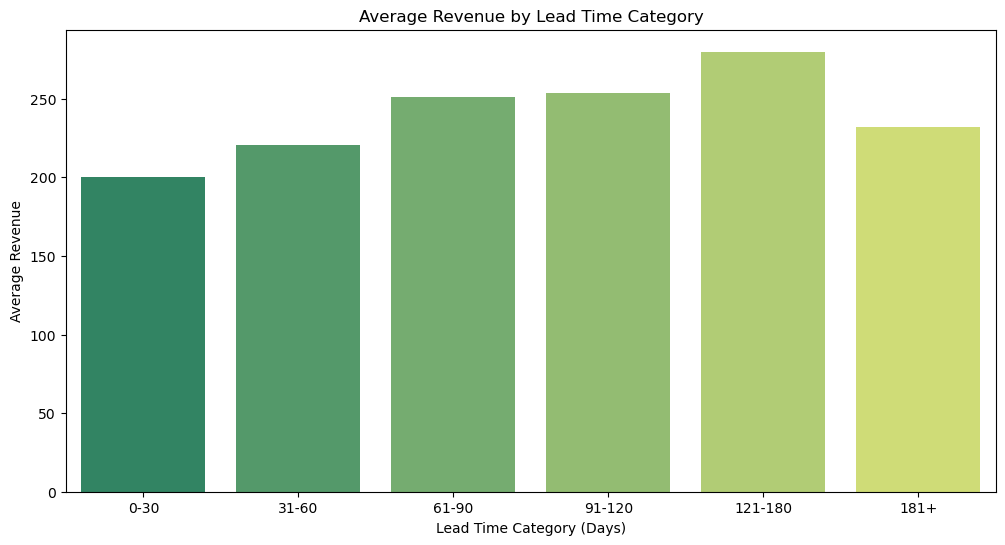

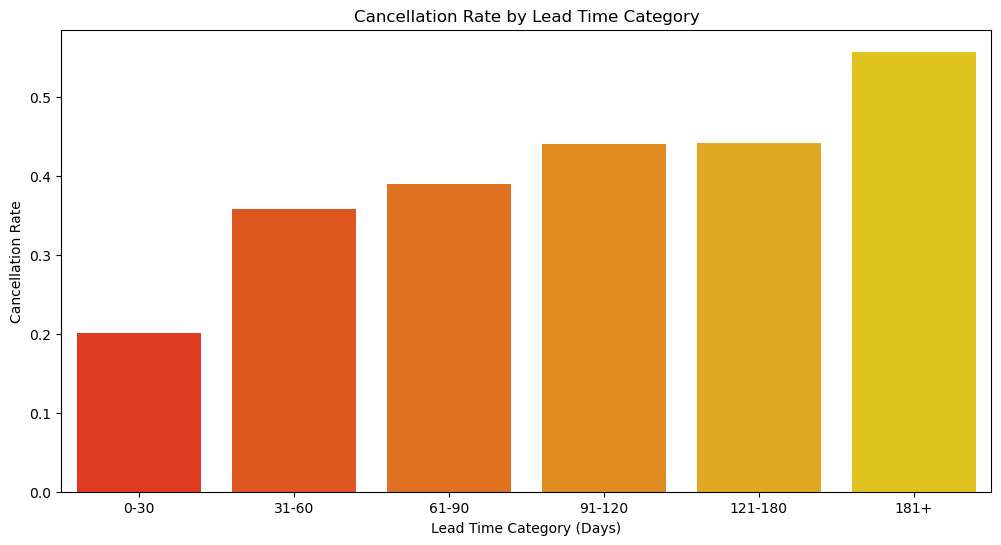

In [139]:
# For a more nuanced analysis, categorize lead time into bins
df_no_outliers['Lead Time Category'] = pd.cut(df_no_outliers['Lead Time'], bins=[0, 30, 60, 90, 120, 180, np.max(df_no_outliers['Lead Time'])], labels=['0-30', '31-60', '61-90', '91-120', '121-180', '181+'])

revenue_by_lead_time = df_no_outliers.groupby('Lead Time Category')['Revenue'].mean()
cancellation_rate_by_lead_time = df_no_outliers.groupby('Lead Time Category')['Cancelled (0/1)'].mean()

# Plotting average revenue by lead time category
plt.figure(figsize=(12,6))
sns.barplot(x=revenue_by_lead_time.index, y=revenue_by_lead_time.values, palette='summer')
plt.title('Average Revenue by Lead Time Category')
plt.xlabel('Lead Time Category (Days)')
plt.ylabel('Average Revenue')
plt.show()

# Plotting cancellation rate by lead time category
plt.figure(figsize=(12,6))
sns.barplot(x=cancellation_rate_by_lead_time.index, y=cancellation_rate_by_lead_time.values, palette='autumn')
plt.title('Cancellation Rate by Lead Time Category')
plt.xlabel('Lead Time Category (Days)')
plt.ylabel('Cancellation Rate')
plt.show()


**Comparison of Online and Offline Travel Agents**

17. What is the revenue contribution of online travel agents compared to offline travel
agents?

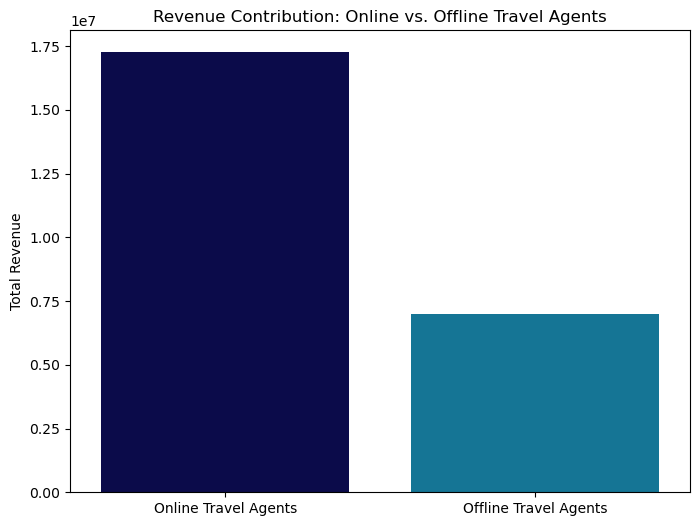

(17255123.51, 6993595.67)

In [140]:
# Calculating the revenue contribution by distribution channel, focusing on online vs. offline travel agents
revenue_by_channel = df.groupby('Distribution Channel')['Revenue'].sum()

# Isolating revenue for online and offline travel agents for comparison
online_revenue = revenue_by_channel.get('Online Travel Agent', 0)
offline_revenue = revenue_by_channel.get('Offline Travel Agent', 0)

# Plotting the revenue contribution of online vs. offline travel agents
plt.figure(figsize=(8,6))
sns.barplot(x=['Online Travel Agents', 'Offline Travel Agents'], y=[online_revenue, offline_revenue], palette='ocean')
plt.title('Revenue Contribution: Online vs. Offline Travel Agents')
plt.ylabel('Total Revenue')
plt.show()

online_revenue, offline_revenue
